# **데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Google Drive 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/project6_cp1/complaints_2021_ca.csv')

In [ ]:
df.head(3)

Date received                                            Product  \
0      12/01/21  Credit reporting, credit repair services, or o...   
1      10/08/21                                    Debt collection   
2      12/08/21  Credit reporting, credit repair services, or o...   

        Sub-product                                              Issue  \
0  Credit reporting  Problem with a credit reporting company's inve...   
1  Credit card debt                  Attempts to collect debt not owed   
2  Credit reporting  Problem with a credit reporting company's inve...   

                                           Sub-issue  \
0  Their investigation did not fix an error on yo...   
1                                      Debt was paid   
2  Their investigation did not fix an error on yo...   

                        Consumer complaint narrative  \
0  This is XXXX XXXX XXXX, who is submitting this...   
1  I am a XXXX XXXX worker, and work at XXXX XXXX...   
2  Unfortunately, I am a victim of identity theft...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1                                               None   
2                                               None   

                                  Company State ZIP code  Tags  \
0  TRANSUNION INTERMEDIATE HOLDINGS, INC.    CA    90272  None   
1             Alliance Data Card Services    CA    94555  None   
2                           EQUIFAX, INC.    CA    90212  None   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web             12/01/21   
1           Consent provided           Web             10/08/21   
2           Consent provided           Web             12/08/21   

      Company response to consumer Timely response?  Consumer disputed?  \
0  Closed with non-monetary relief              Yes                 NaN   
1  Closed with non-monetary relief              Yes                 NaN   
2          Closed with explanation              Yes                 NaN   

   Complaint ID  
0       4966475  
1       4792654  
2       4989948

In [ ]:
df.tail(3)

Date received                                            Product  \
25123      11/21/21                        Checking or savings account   
25124      11/22/21                        Checking or savings account   
25125      10/20/21  Credit reporting, credit repair services, or o...   

            Sub-product                                              Issue  \
25123   Savings account  Problem with a lender or other company chargin...   
25124  Checking account                                Managing an account   
25125  Credit reporting  Problem with a credit reporting company's inve...   

                                               Sub-issue  \
25123                     Transaction was not authorized   
25124                                    Cashing a check   
25125  Difficulty submitting a dispute or getting inf...   

                            Consumer complaint narrative  \
25123  On XX/XX/XXXX there were XXXX fraudulent ACH t...   
25124  I contacted CHASE via telephone regarding my t...   
25125  I have tried to send my disputes to the major ...   

      Company public response               Company State ZIP code  Tags  \
25123                    None  JPMORGAN CHASE & CO.    CA    94025  None   
25124                    None  JPMORGAN CHASE & CO.    CA    93550  None   
25125                    None         EQUIFAX, INC.    CA    93648  None   

      Consumer consent provided? Submitted via Date sent to company  \
25123           Consent provided           Web             11/21/21   
25124           Consent provided           Web             11/22/21   
25125           Consent provided           Web             10/20/21   

      Company response to consumer Timely response?  Consumer disputed?  \
25123      Closed with explanation              Yes                 NaN   
25124      Closed with explanation              Yes                 NaN   
25125      Closed with explanation              Yes                 NaN   

       Complaint ID  
25123       4932847  
25124       4937389  
25125       4828908

# **EDA**

In [4]:
%%capture 
!pip install -U pandas-profiling
import pandas_profiling

In [5]:
%%capture 
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.shape

(25126, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25126 entries, 0 to 25125
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 25126 non-null  object 
 1   Product                       25126 non-null  object 
 2   Sub-product                   25126 non-null  object 
 3   Issue                         25126 non-null  object 
 4   Sub-issue                     25126 non-null  object 
 5   Consumer complaint narrative  25126 non-null  object 
 6   Company public response       25126 non-null  object 
 7   Company                       25126 non-null  object 
 8   State                         25126 non-null  object 
 9   ZIP code                      25126 non-null  object 
 10  Tags                          25126 non-null  object 
 11  Consumer consent provided?    25126 non-null  object 
 12  Submitted via                 25126 non-null  object 
 13  D

In [4]:
# 필요없는 columns 제거

df_new = df[['Product','Consumer complaint narrative']]

In [ ]:
product_unique = df_new['Product'].unique()
product_unique.sort()
product_unique

array(['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Vehicle loan or lease'], dtype=object)

In [ ]:
# target 분포 확인하기

df_new['Product'].value_counts(normalize=True)

Credit reporting, credit repair services, or other personal consumer reports    0.503502
Debt collection                                                                 0.147218
Credit card or prepaid card                                                     0.102205
Mortgage                                                                        0.089031
Checking or savings account                                                     0.074863
Money transfer, virtual currency, or money service                              0.044098
Vehicle loan or lease                                                           0.018387
Payday loan, title loan, or personal loan                                       0.012537
Student loan                                                                    0.008159
Name: Product, dtype: float64

In [ ]:
df_new_product = df_new['Product'].value_counts()
df_new_product

Credit reporting, credit repair services, or other personal consumer reports    12651
Debt collection                                                                  3699
Credit card or prepaid card                                                      2568
Mortgage                                                                         2237
Checking or savings account                                                      1881
Money transfer, virtual currency, or money service                               1108
Vehicle loan or lease                                                             462
Payday loan, title loan, or personal loan                                         315
Student loan                                                                      205
Name: Product, dtype: int64

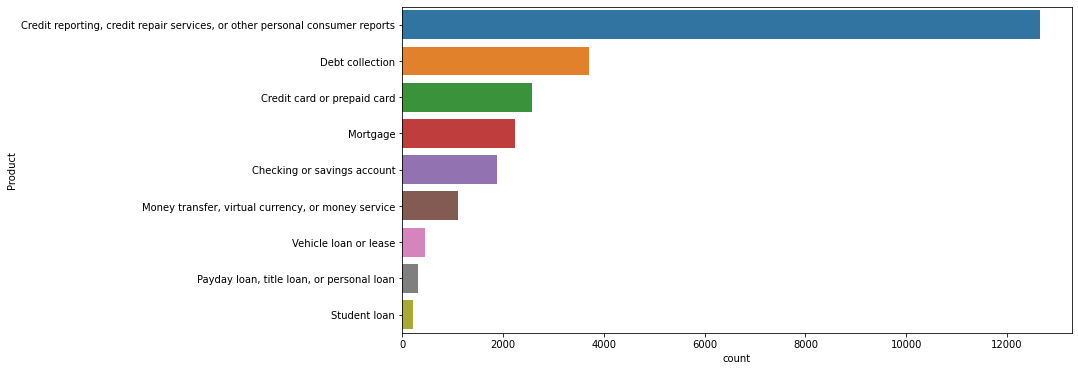

In [5]:
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(y='Product', data=df_new, order = df_new['Product'].value_counts().index, orient='h')

plt.show();

In [ ]:
# 각 고객 불만설명: 텍스트 길이 분포 확인하기

df_new_len = df_new['Consumer complaint narrative'].apply(len)
df_new_len

0         394
1        1472
2        1637
3         304
4        5951
         ... 
25121     194
25122     237
25123    1679
25124     724
25125     184
Name: Consumer complaint narrative, Length: 25126, dtype: int64

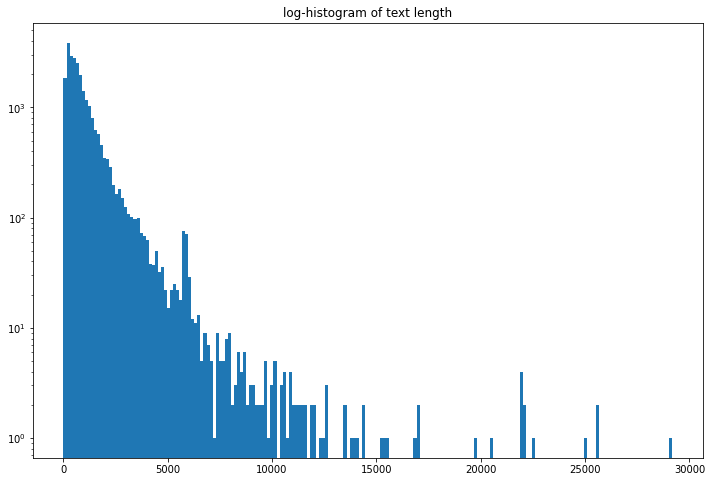

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_new_len, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text length');

In [ ]:
print(f'텍스트 길이 최대값: {np.max(df_new_len)}')
print(f'텍스트 길이 최소값: {np.min(df_new_len)}')
print(f'텍스트 길이 중간값: {np.median(df_new_len)}')
print(f'텍스트 길이 평균: {np.mean(df_new_len)}')
print(f'텍스트 길이 표준편차: {np.std(df_new_len)}')

텍스트 길이 최대값: 29174
텍스트 길이 최소값: 9
텍스트 길이 중간값: 660.0
텍스트 길이 평균: 1018.1209504099339
텍스트 길이 표준편차: 1297.8962995260904


In [ ]:
# 각 고객 불만설명: 텍스트 하나당 갖고 있는 단어 갯수 분포 확인하기

df_new_words = df_new['Consumer complaint narrative'].apply(lambda x:len(x.split(' ')))
df_new_words

0          65
1         264
2         289
3          56
4        1091
         ... 
25121      40
25122      35
25123     284
25124     130
25125      30
Name: Consumer complaint narrative, Length: 25126, dtype: int64

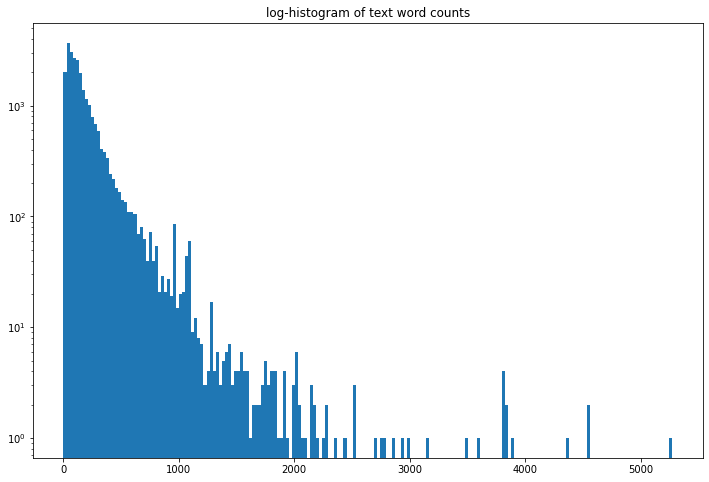

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_new_words, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text word counts');

In [ ]:
print(f'텍스트 하나당 단어 갯수 최대값: {np.max(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 최소값: {np.min(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 중간값: {np.median(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 평균: {np.mean(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 표준편차: {np.std(df_new_words)}')

텍스트 하나당 단어 갯수 최대값: 5271
텍스트 하나당 단어 갯수 최소값: 2
텍스트 하나당 단어 갯수 중간값: 119.0
텍스트 하나당 단어 갯수 평균: 183.3324444798217
텍스트 하나당 단어 갯수 표준편차: 232.06268984882004


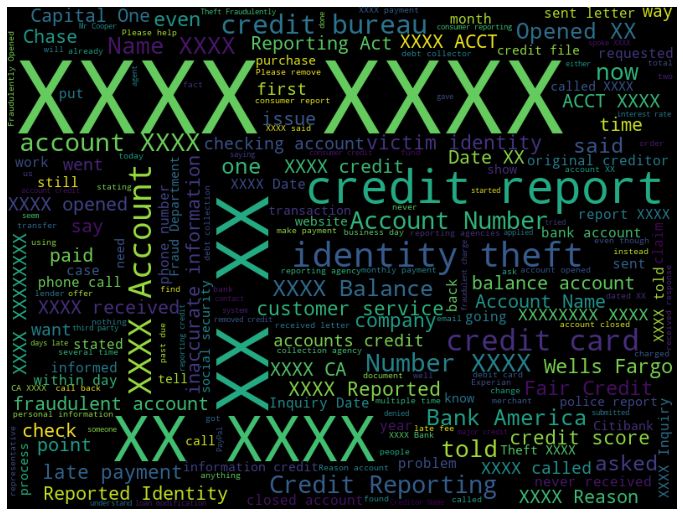

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기

cloud = WordCloud(width=800, height=600).generate(" ".join(df_new['Consumer complaint narrative']))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [ ]:
df_new['Consumer complaint narrative'][0]

'This is XXXX XXXX XXXX, who is submitting this CFPB complaint myself. These accounts are reporting late as reported in Transunion. Lets correct this immediately. Transunion is required to verify for themselves, but they failed to neither verify nor update me about these complaints. Please update or remove the late payments from these accounts. \n\n( XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX  XXXX )'

In [ ]:
df_new['Consumer complaint narrative'][1]   

'I am a XXXX XXXX worker, and work at XXXX XXXX. \nDuring Covid, I was marked late for XX/XX/XXXX, for my Comenity and Express cards Comenity Bank Express card : XXXX and Victoria Secret Card : XXXX. \nI had over $ XXXX in my checking account to make the payments on these, however I came down with XXXX  and the rest of my family was XXXX  as well. \n\nI was in no mental and physical shape to attend to my mail. I was sure that I had made a payment online, but apparently Comenity claims nothing was received. \nAfter finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for 60 days, however I was still marked late despite not being 60 days late. \n\nI am trying to apply for a mortgage and these late payments have destroyed my chances. Im a loyal and happy Comenity customer, Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XX/XX/XXXX, late payments off BOTH my

In [ ]:
df_new['Consumer complaint narrative'][500]   ## 발견한 문자: X , / : . \n $ { } ( ) #

'This is XXXX XXXX who is submitting this CFPB complaint myself. I sent letters to Experian Credit Bureau the date of the last letter was on XX/XX/XXXX. And now we are in the month of XX/XX/XXXX and still nothing from them. That means Experian has NOT complied with the Fair Credit Reporting Act law and continued to report inaccurate information on my credit report. REMOVE THESE FOLLOWING ACCOUNTS COMPLETELY FROM MY CREDIT REPORT : ( XXXX XXXX XXXX  XXXX, XXXX XXXX, XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX : XX/XX/XXXX Reference # : XXXX, XXXX XXXX XXXX XXXX Filed/Reported : XX/XX/XXXX Reference # : XXXX )'

In [ ]:
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

In [ ]:
print(df_new.loc[df_new['Consumer complaint narrative'].str.contains('XXXXdays')])

                                                 Product                       Consumer complaint narrative
99     Credit reporting, credit repair services, or o...  I have sent letters to Equifax, XXXX and XXXX ...
3478   Credit reporting, credit repair services, or o...  I have sent letters to XXXX, XXXX and TransUni...
5146   Credit reporting, credit repair services, or o...  Hi XXXX has a low and unfair credit number for...
12860  Credit reporting, credit repair services, or o...  I received a copy of my Trans Union credit rep...
23825  Credit reporting, credit repair services, or o...  Hi XXXX has a low and unfair credit number for...


In [ ]:
# 각 고객 불만사항 마다 대문자 포함 여부 확인하기

capital = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: max([i.isupper() for i in x])))
print(f'대문자가 포함된 불만사항 비율: {capital*100:.2f}%')

대문자가 포함된 불만사항 비율: 99.67%


In [ ]:
# 각 고객 불만사항 마다 구두점, 특수문자 포함 여부 확인하기

qmark = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '?' in x))
print(f'물음표가 포함된 불만사항 비율: {qmark*100:.2f}%')

comma = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: ',' in x))
print(f'쉼표가 포함된 불만사항 비율: {comma*100:.2f}%')

close = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '.' in x))
print(f'마침표가 포함된 불만사항 비율: {close*100:.2f}%')

enter = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '\n' in x))
print(f'\\n가 포함된 불만사항 비율: {enter*100:.2f}%')

xchar = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: 'X' in x))
print(f'문자 X 포함된 불만사항 비율: {xchar*100:.2f}%')

물음표가 포함된 불만사항 비율: 7.58%
쉼표가 포함된 불만사항 비율: 69.12%
마침표가 포함된 불만사항 비율: 96.92%
\n가 포함된 불만사항 비율: 39.48%
문자 X 포함된 불만사항 비율: 77.98%


# **데이터 전처리**

## **1) 라벨 인코딩**

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# LabelEncoder를 사용하여 label 전처리
encoded = LabelEncoder()
df_new['Product'] = encoded.fit_transform(df_new['Product'])

# 변환된 label classes 확인
print(encoded.classes_)

['Checking or savings account' 'Credit card or prepaid card'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Money transfer, virtual currency, or money service'
 'Mortgage' 'Payday loan, title loan, or personal loan' 'Student loan'
 'Vehicle loan or lease']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## **2) 텍스트 전처리 연습해보기**

### PART 1. 특수문자 제거, 대소문자 통일
* 특수문자 제거 => 정규식 <br>
* 문자 X 제거 => 정규식 <br>
* 대소문자 통일 & 임시 토큰화 => lower().split() <br>

In [8]:
import re

In [ ]:
ex0 = 'This is X XX XXX XXXX'
ex1 = 'This is XXXX XXXX XXXX, who is submitting this CFPB complaint myself. These accounts are reporting late as reported in Transunion. Lets correct this immediately. Transunion is required to verify for themselves, but they failed to neither verify nor update me about these complaints. Please update or remove the late payments from these accounts. \n\n( XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX  XXXX )'
ex2 = 'I am a XXXX XXXX worker, and work at XXXX XXXX. \nDuring Covid, I was marked late for XX/XX/XXXX, for my Comenity and Express cards Comenity Bank Express card : XXXX and Victoria Secret Card : XXXX. \nI had over $ XXXX in my checking account to make the payments on these, however I came down with XXXX  and the rest of my family was XXXX  as well. \n\nI was in no mental and physical shape to attend to my mail. I was sure that I had made a payment online, but apparently Comenity claims nothing was received. \nAfter finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for 60 days, however I was still marked late despite not being 60 days late. \n\nI am trying to apply for a mortgage and these late payments have destroyed my chances. Im a loyal and happy Comenity customer, Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XX/XX/XXXX, late payments off BOTH my accounts, given that Im a XXXX XXXX. \n\nAccounts information : Account information number 1 : Account name : COMENITY BANK/EXPRESS Account number : XXXX Balance : {$83.00} Date opened : XX/XX/XXXX Account status : Open Account information number 2 : Account name : COMENITYBANK/VICTORIA Account number : XXXX Balance : {$1500.00} Date opened : XXXX XXXX, XXXX Account status : Open Please see attached my XXXX XXXX ID. \n\nSolution : remove XXXX late payments XXXX from my accounts.'
ex3 = 'Its been over XXXXdays so they should be deleted promptly.'
ex4 = """If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation."""

In [ ]:
# 영어를 제외하고 나머지는 모두 제거

ex2_pp = re.sub("[^a-zA-Z ]","",ex2)
ex2_pp

'I am a XXXX XXXX worker and work at XXXX XXXX During Covid I was marked late for XXXXXXXX for my Comenity and Express cards Comenity Bank Express card  XXXX and Victoria Secret Card  XXXX I had over  XXXX in my checking account to make the payments on these however I came down with XXXX  and the rest of my family was XXXX  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XXXXXXXX late payments off BOTH my accounts given that Im a XXXX XXXX Acco

In [ ]:
# 연속된 X문자 제거하기

ex2_pp = re.sub("XX+ ","",ex2_pp)
ex2_pp

'I am a worker and work at During Covid I was marked late for for my Comenity and Express cards Comenity Bank Express card  and Victoria Secret Card  I had over  in my checking account to make the payments on these however I came down with  and the rest of my family was  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the late payments off BOTH my accounts given that Im a Accounts information  Account information number   Account name  COMENITY BAN

In [ ]:
# X 문자 없애기 연습(1)

regex = re.compile("X+")   # X 1 or more previous char
regex = re.compile("XX+")  # X 2 or more previois char
mo = regex.findall(ex2)

print(mo)
# print(len(mo))  # 29

# search 메소드 사용했을 때,
# if mo != None:
#     print(mo.group()) 

['XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX']


In [ ]:
# X 문자 없애기 연습(2)

test = 'abbbsdfcdZZZZ11111)'
test1 = re.sub('(([a-zA-Z0-9])\\2{1,})', '', test) # 연속된 같은 문자 변환 (2개이상)
test2 = re.sub('(([a-zA-Z0-9])\\2{2,})', '', test) # 연속된 같은 문자 변환 (3개이상)
test3 = re.sub('(([a-zA-Z0-9])\\2{3,})', '', test) # 연속된 같은 문자 변환 (4개이상)
test4 = re.sub('(([a-zA-Z0-9])\\2{4,})', '', test) # 연속된 같은 문자 변환 (5개이상)

print(test1) 
print(test2)  
print(test3)
print(test4)

##### OUTPUT #####
# asdfcd)
# asdfcd)
# abbbsdfcd)
# abbbsdfcdZZZZ)

asdfcd)
asdfcd)
abbbsdfcd)
abbbsdfcdZZZZ)


In [ ]:
# X 문자 없애기 연습(2)
test_pp = re.sub('((X)\\2{2,}) ', '', ex2_pp) # 연속된 같은 문자 변환 (2개이상)
test_pp 

'I am a worker and work at During Covid I was marked late for for my Comenity and Express cards Comenity Bank Express card  and Victoria Secret Card  I had over  in my checking account to make the payments on these however I came down with  and the rest of my family was  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the late payments off BOTH my accounts given that Im a Accounts information  Account information number   Account name  COMENITY BAN

In [ ]:
# 소문자로 통일, 임시토큰화

ex2_pp_words = ex2_pp.lower().split()
print(ex2_pp_words)

['i', 'am', 'a', 'worker', 'and', 'work', 'at', 'during', 'covid', 'i', 'was', 'marked', 'late', 'for', 'for', 'my', 'comenity', 'and', 'express', 'cards', 'comenity', 'bank', 'express', 'card', 'and', 'victoria', 'secret', 'card', 'i', 'had', 'over', 'in', 'my', 'checking', 'account', 'to', 'make', 'the', 'payments', 'on', 'these', 'however', 'i', 'came', 'down', 'with', 'and', 'the', 'rest', 'of', 'my', 'family', 'was', 'as', 'well', 'i', 'was', 'in', 'no', 'mental', 'and', 'physical', 'shape', 'to', 'attend', 'to', 'my', 'mail', 'i', 'was', 'sure', 'that', 'i', 'had', 'made', 'a', 'payment', 'online', 'but', 'apparently', 'comenity', 'claims', 'nothing', 'was', 'received', 'after', 'finding', 'out', 'i', 'was', 'marked', 'late', 'checked', 'the', 'comenitys', 'website', 'which', 'said', 'i', 'would', 'only', 'be', 'marked', 'late', 'if', 'payments', 'werent', 'received', 'for', '60', 'days', 'however', 'i', 'was', 'still', 'marked', 'late', 'despite', 'not', 'being', '60', 'days', '

### PART 2. 불용어 처리, 표제어 추출
* 불용어 처리 => spaCy <br>
* Lemmatization => spaCy <br>

In [ ]:
# 불용어 처리: nltk (nltk 불용어 리스트 데이터를 설치)

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords_nltk = stopwords.words('english')

print(stopwords_nltk)
# len(stopwords_nltk)  #179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# not 불용어 포함 유무 확인: True

print('not' in stopwords_nltk)
print("""don't""" in stopwords_nltk)

True
True


In [9]:
# 불용어 처리: spacy (spacy 설치)

import spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(stopwords)
# len(stopwords)   #326

{'out', 'of', 'only', 'mostly', 'without', 'becomes', 'anything', 'hereupon', 'i', 'be', 'top', 'was', 'back', 'though', 'amount', 'see', 'just', 'how', 'if', 'fifty', 'three', 'twenty', 'eight', 'on', 'were', 'alone', 'all', 'a', 'in', 'should', 'become', 'yourselves', 'hence', 'part', 'meanwhile', 'itself', 'thereupon', 'front', 'there', 'during', 'who', 'else', 'however', 'ours', 'thereby', 'twelve', 'together', 'with', 'your', 'serious', 'myself', 'along', 'whither', 'four', 'seeming', 'due', 'although', 'before', 'put', 'whereafter', "'ve", 'already', 'will', 'please', 'well', 'nobody', 'where', 'nine', '’re', 'n‘t', 'somehow', 'which', 'by', 'really', 'keep', 'nevertheless', 'almost', 'ourselves', 'had', 'further', 'me', 'he', 'therein', 'after', 'whole', 'whereupon', 'did', 'what', 'sometimes', 'name', 'cannot', 'through', 'therefore', 'sixty', 'it', 'give', 'less', 'something', 'go', 'these', '‘ll', '‘re', 'at', 'under', 'several', 'fifteen', 'nothing', 'about', 'up', 'even', '

In [ ]:
# not 불용어 포함 유무 확인: True

print("not:", 'not' in stopwords)
print("don't:", """don't""" in stopwords)
print("able:", "able" in stopwords, '\n')

print("be:", "be" in stopwords)
print("am:", "am" in stopwords)
print("are:", "are" in stopwords)
print("is:", "is" in stopwords)
print("was:", "was" in stopwords)
print("were:", "were" in stopwords, '\n')

print("do:", "do" in stopwords)
print("does:", "does" in stopwords)
print("did:", "did" in stopwords, '\n')

print("have:", "have" in stopwords)
print("has:", "has" in stopwords)
print("had:", "had" in stopwords)
print("been", "been" in stopwords)
print("can:", "can" in stopwords)
print("will:", "will" in stopwords)
print("would:", "would" in stopwords)
print("could:", "could" in stopwords)
print("should:", "should" in stopwords, '\n')

print("let:", "let" in stopwords)
print("lets:", "lets" in stopwords)
print("let's:", """let's""" in stopwords)

print("its:", "its" in stopwords)
print("youre:", "youre" in stopwords, '\n')

print("s:", "s" in stopwords)

not: True
don't: False
able: False 

be: True
am: True
are: True
is: True
was: True
were: True 

do: True
does: True
did: True 

have: True
has: True
had: True
been True
can: True
will: True
would: True
could: True
should: True 

let: False
lets: False
let's: False
its: True
youre: False 

s: False


In [ ]:
# Lemmatization

text333 = "The social wolf. Wolves are complex."
text444 = "I was reading the paper worker works."
text666 = "id youd wed theyd ive youve"                # ['would', 'would', 'have', 'have']
text777 = "im ill youll"                     # ['be', 'ill', 'will']
text888 = "thats theres hes shes lets let"   # ['s', 's', 's', 's', 'let', 'let']

# its    X
# youre  X

In [ ]:
text501 = "dont"        # ['not']
text502 = "didnt"       # ['not']
text503 = "cant"        # ['not']
text504 = "havent"      # ['not']
text505 = "wasnt"       # ['not']
text506 = "couldnt"     # ['not']
text507 = "doesnt"      # ['not']
text508 = "wont"        # 'wo', 'nt'   # ['will', 'not']
text509 = "wouldnt"     # ['not']
text510 = "isnt"        # ['not']
text511 = "hasnt"       # ['not']
text512 = "hadnt"       # ['not']
text513 = "arent"       # ['not']
text514 = "shouldnt"    # ['not']
text515 = "werent"      # ['not']
text516 = "aint"        # 'ai', 'nt'   # ['be', 'not'] 
text517 = "neednt"      # 'need', 'nt' # ['need', 'not']

text518 = "nt"          # ['nt'] ---------------------------> nt가 하나만 존재하면 not으로 안바꾸네......?!
text519 = "don't"       # [] 
text520 = "don`t"       # ['don`t']

In [ ]:
doc = en(text666)

lemmas = []
for token in doc:

  # lemmas.append(token)
  # is_stop : 불용어 리스트 포함여부
  # is_punct : 문장부호 인지아닌지
  # pos_ : 품사 / 'PRON' 대명사는 표제어추출이 그대로 -PRON- 으로 추출됨

  if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
    lemmas.append(token.lemma_)
    
lemmas

['would', 'would', 'would', 'would', 'have', 'have']

### PART 3. 축약형 확장 처리
* 축약형 확장 처리 => contractions

In [10]:
%%capture 
!pip install contractions
import contractions

In [ ]:
print(contractions.fix(ex3))
print(contractions.fix(ex4))

Its been over XXXXdays so they should be deleted promptly.
If this does not get resolved I will seek litigation, and charge {$1000.00} per violation.


In [ ]:
text_1001 = '''you've'''
text_1002 = '''youve'''
text_1003 = '''you'd'''
text_1004 = '''youd'''
text_1005 = '''i'd'''
text_1006 = '''id'''
text_1007 = '''wed'''
text_1008 = '''theyd'''
text_1101 = '''aren't'''
text_1102 = '''arent'''
text_1103 = '''don`t'''
text_1500 = '''I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends. We've been waiting for this day for so long.'''

print(contractions.fix(text_1001))
print(contractions.fix(text_1002))
print(contractions.fix(text_1003))
print(contractions.fix(text_1004))
print(contractions.fix(text_1005))
print(contractions.fix(text_1006))
print(contractions.fix(text_1007))
print(contractions.fix(text_1008))
print(contractions.fix(text_1101))
print(contractions.fix(text_1102))
print(contractions.fix(text_1103))
print(contractions.fix(text_1500))

you have
you have
you would
you would
i would
id
wed
they would
are not
are not
don`t
I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.


In [ ]:
# creating an empty list
expanded_words = []

for word in text_1005.split():

  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))  
   
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text_1005)
print('Expanded_text: ' + expanded_text)

Original text: I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends. We've been waiting for this day for so long.
Expanded_text: I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.


## **3) 텍스트 전처리 함수 만들기**

In [11]:
%%capture 
!pip install squarify
import squarify

### PART 1. 특수문자 제거, 대소문자 통일

In [ ]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 (불용어 처리 제외 ver.)

def pp_dummy(text):

  # 영어가 아닌 숫자, 특수문자 제거
  complaints = re.sub("[^a-zA-Z ]","",text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  return words

In [ ]:
df_new['words'] = df_new['Consumer complaint narrative'].apply(pp_dummy)
df_new.head()

# df_new.drop(["words"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new['words'].apply(len)

0         51
1        222
2        274
3         56
4        955
        ... 
25121     40
25122     35
25123    276
25124    122
25125     30
Name: words, Length: 25126, dtype: int64

In [ ]:
# 단어 카운트 함수 만들기

from collections import Counter

def word_count(docs):

    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
wc = word_count(df_new['words'])
wc.head(20)

word  word_in_docs   count  ...   percent  cul_percent  word_in_docs_percent
36       the         21365  184078  ...  0.043208     0.043208              0.850314
87         i         22220  156225  ...  0.036670     0.079879              0.884343
9         to         21959  152249  ...  0.035737     0.115616              0.873955
121      and         21870  124884  ...  0.029314     0.144930              0.870413
70        my         21977   99693  ...  0.023401     0.168331              0.874672
116        a         18871   88365  ...  0.020742     0.189072              0.751055
44        of         18196   81673  ...  0.019171     0.208243              0.724190
48      that         16707   64771  ...  0.015204     0.223447              0.664929
47        on         18124   56661  ...  0.013300     0.236747              0.721325
86       was         13249   51501  ...  0.012089     0.248836              0.527302
8       this         15996   50690  ...  0.011898     0.260734              0.636631
16        in         15443   49097  ...  0.011524     0.272258              0.614622
22        is         15779   46632  ...  0.010946     0.283204              0.627995
125      not         16428   45640  ...  0.010713     0.293917              0.653825
83      have         16763   44162  ...  0.010366     0.304283              0.667158
34      they         13149   43688  ...  0.010255     0.314538              0.523322
186   credit         15626   42744  ...  0.010033     0.324571              0.621906
46   account         11730   42699  ...  0.010023     0.334594              0.466847
21        me         13599   39711  ...  0.009321     0.343915              0.541232
15       for         13885   39269  ...  0.009218     0.353133              0.552615

[20 rows x 7 columns]

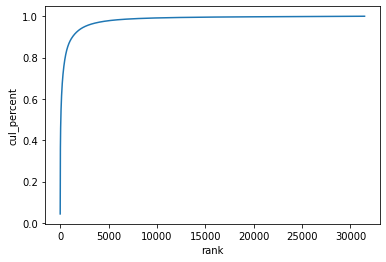

In [ ]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [ ]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.8784684062548558

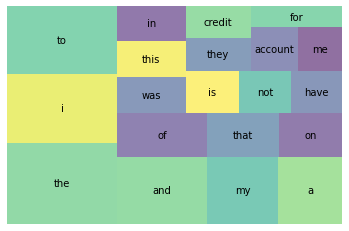

In [ ]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 대부분 불용어인 것을 확인 할 수 있다.



---
**split() 말고 spaCy Tokenizer 통해서 토큰화 해보려고 했는데 연속된 문자 제거하는 게 계속 실패하고 있어서 일단 스킵**

In [ ]:
# spacy Tokenizer 통해서 토큰화 (불용어 처리 제외 ver.)

from spacy.tokenizer import Tokenizer

# en = spacy.load('en_core_web_sm') ---> 위에서 이미 실행한 명령어
tokenizer = Tokenizer(en.vocab)

In [ ]:
# 토큰화를 위한 파이프라인 구성

tokens = []
regax = re.compile("((x)\\2{2,})")

for doc in tokenizer.pipe(df_new['Consumer complaint narrative']):
  doc_res = []
  for token in doc:
    token = token.text.lower()
    doc_tokens = re.sub(regax, "", token)
    # doc_tokens = re.sub(r"[^a-z0-9]", "", token)
    # doc_tokens = re.sub(r"[^a-z0-9]|[xx+ ]", "", token)
    # doc_tokens = re.sub(r"[xx+ ]", "", doc_tokens)
    doc_res.append(doc_tokens)
  tokens.append(doc_res)

df_new['tokens'] = tokens
df_new.head()

In [ ]:
# df_new.drop(["tokens"], axis=1, inplace=True)
df_new



---



### PART 2. + 불용어 제거

In [ ]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 -> 다시 join 붙여주기 (불용어 처리 포함 ver.)

def pp_real2_stop(text):

  # 영어가 아닌 모든 것(숫자,특수문자 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]     # 단어 분리
  # clean_complaints = " ".join(words)                   # 문장으로 합침
  
  return words                  # 단어 분리
  # return clean_complaints       # 문장으로 합침

In [ ]:
# 단어로 분리할 때
df_new['words_real2_words'] = df_new['Consumer complaint narrative'].apply(pp_real2_stop)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Product                       Consumer complaint narrative  \
0        2  This is XXXX XXXX XXXX, who is submitting this...   
1        3  I am a XXXX XXXX worker, and work at XXXX XXXX...   
2        2  Unfortunately, I am a victim of identity theft...   
3        2  I am a victim of identity theft. I have been a...   
4        2  XXXX. XXXX XXXX XXXX Account Number : XXXX Ple...   

                                   words_real5_words  \
0  [submit, cfpb, complaint, account, report, lat...   
1  [worker, work, covid, mark, late, comenity, ex...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real2_words  
0  [submitting, cfpb, complaint, accounts, report...  
1  [worker, work, covid, marked, late, comenity, ...  
2  [unfortunately, victim, identity, theft, accou...  
3  [victim, identity, theft, victim, identity, th...  
4  [account, number, correct, inaccurate, informa...

In [ ]:
# df_new.drop(["words_real2_words"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# lemmatization 전

df_new['words_real2_words'].apply(len)

0         23
1        114
2        130
3         25
4        412
        ... 
25121     13
25122     17
25123    123
25124     52
25125     16
Name: words_real2_words, Length: 25126, dtype: int64

In [ ]:
# lemmatization 전

wc_real2 = word_count(df_new['words_real2_words'])
wc_real2.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
43        account         11733  42855   1.0  0.023617     0.023617   
109        credit         15628  42784   2.0  0.023578     0.047196   
151        report         11019  20988   3.0  0.011566     0.058762   
47    information          7976  17113   4.0  0.009431     0.068193   
72           bank          4737  12998   5.0  0.007163     0.075356   
38        payment          4508  12567   6.0  0.006926     0.082282   
0       reporting          5480  11884   7.0  0.006549     0.088831   
33           card          4321  11443   8.0  0.006306     0.095137   
435          loan          3630  11392   9.0  0.006278     0.101415   
10       accounts          5724  10714  10.0  0.005904     0.107320   
69       received          6446  10538  11.0  0.005807     0.113127   
421          told          4675   9544  12.0  0.005260     0.118387   
208          time          5681   9476  13.0  0.005222     0.123609   
1403         debt          3220   8833  14.0  0.004868     0.128477   
82           sent          5597   8704  15.0  0.004797     0.133274   
37         number          3953   8447  16.0  0.004655     0.137929   
342        called          4782   8409  17.0  0.004634     0.142563   
68        balance          3449   8297  18.0  0.004572     0.147136   
49           days          4726   8230  19.0  0.004536     0.151671   
458       company          4632   8123  20.0  0.004477     0.156148   

      word_in_docs_percent  
43                0.466966  
109               0.621985  
151               0.438550  
47                0.317440  
72                0.188530  
38                0.179416  
0                 0.218101  
33                0.171973  
435               0.144472  
10                0.227812  
69                0.256547  
421               0.186062  
208               0.226100  
1403              0.128154  
82                0.222757  
37                0.157327  
342               0.190321  
68                0.137268  
49                0.188092  
458               0.184351

In [ ]:
# 'not' 포함 유무 확인 : False
wc_real2.loc[wc_real2['word'] == 'not']

Empty DataFrame
Columns: [word, word_in_docs, count, rank, percent, cul_percent, word_in_docs_percent]
Index: []

In [ ]:
# wc_real_edit = wc_real.reset_index(drop=True)
wc_real_edit.loc[110:119]

word  word_in_docs  count   rank   percent  cul_percent  \
110       original          1755   2728  111.0  0.001503     0.367621   
111  investigation          1784   2698  112.0  0.001487     0.369108   
112           want          2124   2682  113.0  0.001478     0.370586   
113       disputed          1752   2649  114.0  0.001460     0.372045   
114           fcra          1612   2647  115.0  0.001459     0.373504   
115            got          1957   2639  116.0  0.001454     0.374959   
116    transaction          1342   2635  117.0  0.001452     0.376411   
117       experian          1070   2590  118.0  0.001427     0.377838   
118      following          2066   2564  119.0  0.001413     0.379251   
119          didnt          1780   2560  120.0  0.001411     0.380662   

     word_in_docs_percent  
110              0.069848  
111              0.071002  
112              0.084534  
113              0.069729  
114              0.064157  
115              0.077887  
116              0.053411  
117              0.042585  
118              0.082226  
119              0.070843

In [ ]:
# part3에서 'not' 이 왜 갑자기 나왔는지 이전 단계인 part2 에서 원인 찾아보기

# dont: 4160
# didnt: 2560
# cant: 1208
# havent: 863
# wasnt: 807
# couldnt: 784
# doesnt: 662
# wont: 551
# wouldnt: 395
# isnt: 357
# hasnt: 193
# hadnt: 160
# arent: 130
# shouldnt: 199
# werent: 112
# aint: 11
# neednt: 1
# mightnt / mustnt / oughtnt: 0

wc_real2.loc[(wc_real2['word'] == 'dont') | 
             (wc_real2['word'] == 'didnt') | 
             (wc_real2['word'] == 'cant') | 
             (wc_real2['word'] == 'havent') | 
             (wc_real2['word'] == 'wasnt') |
             (wc_real2['word'] == 'couldnt') |
             (wc_real2['word'] == 'doesnt') |
             (wc_real2['word'] == 'wont') |
             (wc_real2['word'] == 'wouldnt') |
             (wc_real2['word'] == 'isnt') |
             (wc_real2['word'] == 'hasnt') |
             (wc_real2['word'] == 'hadnt') |
             (wc_real2['word'] == 'arent') |
             (wc_real2['word'] == 'shouldnt') |
             (wc_real2['word'] == 'werent') |
             (wc_real2['word'] == 'aint') |
             (wc_real2['word'] == 'neednt')]

word  word_in_docs  count     rank       percent  cul_percent  \
81         dont          2798   4160     55.0  2.292573e-03     0.262823   
420       didnt          1780   2560    120.0  1.410814e-03     0.380662   
1029       cant          1208   1515    240.0  8.349154e-04     0.509006   
712      havent           809    863    436.0  4.755987e-04     0.632908   
2259      wasnt           657    807    455.0  4.447371e-04     0.641638   
1683    couldnt           627    784    464.0  4.320619e-04     0.645569   
2171     doesnt           595    662    531.0  3.648277e-04     0.672355   
2710       wont           472    551    627.0  3.036557e-04     0.704247   
1881    wouldnt           329    395    803.0  2.176842e-04     0.749195   
422        isnt           325    357    864.0  1.967425e-04     0.761776   
1981   shouldnt           187    199   1359.0  1.096688e-04     0.833447   
3263      hasnt           187    193   1386.0  1.063622e-04     0.836362   
437       hadnt           151    160   1599.0  8.817589e-05     0.857057   
2968      arent           124    130   1792.0  7.164291e-05     0.872467   
25       werent           107    112   1955.0  6.172312e-05     0.883325   
4599       aint            11     11   6249.0  6.062092e-06     0.972169   
20634    neednt             1      1  22059.0  5.510993e-07     0.996957   

       word_in_docs_percent  
81                 0.111359  
420                0.070843  
1029               0.048078  
712                0.032198  
2259               0.026148  
1683               0.024954  
2171               0.023681  
2710               0.018785  
1881               0.013094  
422                0.012935  
1981               0.007442  
3263               0.007442  
437                0.006010  
2968               0.004935  
25                 0.004259  
4599               0.000438  
20634              0.000040

In [ ]:
# 'not' 이외에 다른 축약형 형태 단어 포함 유무 확인

# not: 0
# would: 0
# s: 4796
# be: 0
# let: 1336
# lets: 93
# have: 0

# im: 3535
# id: 1627
# ive: 2746
# ill: 163
# ll: 8
# youre: 166
# theyre: 360
# its X
# re X

wc_real2.loc[(wc_real2['word'] == 'would') | (wc_real2['word'] == 's') | (wc_real2['word'] == 'be') | (wc_real2['word'] == 'let') | (wc_real2['word'] == 'lets')]

word  word_in_docs  count    rank   percent  cul_percent  \
94      s          2631   4796    43.0  0.002643     0.233931   
113   let          1094   1336   284.0  0.000736     0.543389   
9    lets            89     93  2174.0  0.000051     0.895777   

     word_in_docs_percent  
94               0.104712  
113              0.043541  
9                0.003542

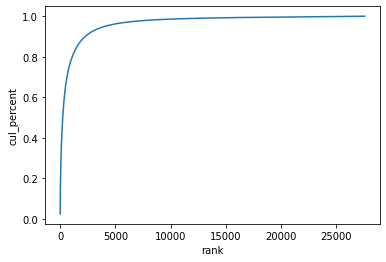

In [ ]:
# lemmatization 전
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real2);

In [ ]:
# lemmatization 전

wc_real2[wc_real2['rank'] <= 1000]['cul_percent'].max()

# wc_real2[wc_real2['rank'] <= 2000]['cul_percent'].max()    ## 0.886
# wc_real2[wc_real2['rank'] <= 2500]['cul_percent'].max()    ## 0.910
# wc_real2[wc_real2['rank'] <= 3000]['cul_percent'].max()    ## 0.927
# wc_real2[wc_real2['rank'] <= 4000]['cul_percent'].max()    ## 0.949
# wc_real2[wc_real2['rank'] <= 5000]['cul_percent'].max()    ## 0.962

0.7856378010035531

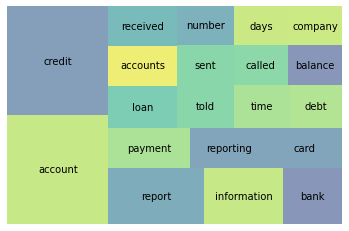

In [ ]:
# lemmatization 전
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real2_top20 = wc_real2[wc_real2['rank'] <= 20]
squarify.plot(sizes=wc_real2_top20['percent'], label=wc_real2_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 불용어들이 제거되니 의미있는 단어들을 발견할 수 있다.

In [ ]:
# 문장으로 붙여서 하나의 리스트에 넣기 (wordcloud 만들 때 & 마지막 데이터프레임으로 만들 때 필요)

words_real2_sen = []
for text in df_new['Consumer complaint narrative']:
  words_real2_sen.append(pp_real2_stop(text))

In [ ]:
# 전처리 함수를 거친 불만사항 99번째 데이터 확인
words_real2_sen[99]

'sent letters equifax false negative accounts credit report sent documents letters behalf determined credit furnisher verified report misleading suspicious section states failure investigate items days gives reason immediately remove items credit report days deleted promptly demand accounts deleted immediately file litigation stress caused information impacted equifax data breach gotten hands wrong person report misleading suspicious federal law violations companies committing doesnt resolved seek litigation charge violation penalty perjury swear account false misleading usc method verification account violation reported valid evidence code e b code account violation reporting accurateunauthorizederroneous account result equifax data breach direct violation fcra reporting falsely code b exclusions consumer report account violation credit transaction supposed excluded consumer credit report social security card transactioncontacted creditoragency asked proof alleged debt specifically al

In [ ]:
# 원래 불만사항 99째 데이터 확인 비교
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

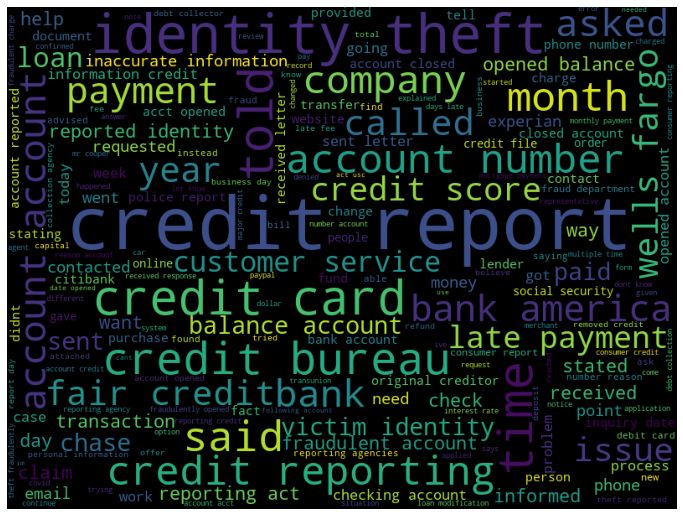

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기 (불용어 제거후)

cloud = WordCloud(width=800, height=600).generate(" ".join(words_real2_sen))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [ ]:
# X 문자 왜 보이지?? -----> xxxx2021 처럼 xxxx이 일반단어랑 붙어있는거는 안없어진거 같다.

# regex = re.compile("X+")   # X 1 or more previous char
regex = re.compile("XX+")  # X 2 or more previois char
# mo = regex.findall(clean_complaint_narrative)

xx_num = 0
for i in words_real2_sen:
  mo = regex.findall(i)
  xx_num += len(mo)

print(xx_num)
# search 메소드 사용했을 때,
# if mo != None:
#     print(mo.group()) 

0


In [ ]:
# 지금까지 전처리한 데이터를 새로운 데이터프레임으로 저장해두기 (불용어 제거후)

df_clean = pd.DataFrame({'product':df_new['Product'], 'complaint':words_real2_sen})
df_clean.head(3)

# len(df_clean)
# 25126

product                                          complaint
0        2  submitting cfpb complaint accounts reporting l...
1        3  worker work covid marked late comenity express...
2        2  unfortunately victim identity theft account cr...

In [ ]:
df_clean_original = df_clean.copy()

In [ ]:
df_clean_original.head(3)

product                                          complaint
0        2  submitting cfpb complaint accounts reporting l...
1        3  worker work covid marked late comenity express...
2        2  unfortunately victim identity theft account cr...

### PART 3. + 표제어 처리

In [ ]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 -> 다시 join 붙여주기 (불용어 처리 포함 ver.)

def pp_real3_lemma(text):

  # 영어가 아닌 모든 것(숫자,특수문자 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]
  clean_complaints = " ".join(words)

  # 표제어 처리 (spaCy)
  doc = en(clean_complaints)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  # clean_complaints = " ".join(lemmas)
  
  return lemmas               # 단어 분리
  # return clean_complaints     # 문장으로 합침

In [ ]:
# 단어로 분리할 때
df_new['words_real3_words'] = df_new['Consumer complaint narrative'].apply(pp_real3_lemma)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Product                       Consumer complaint narrative  \
0        2  This is XXXX XXXX XXXX, who is submitting this...   
1        3  I am a XXXX XXXX worker, and work at XXXX XXXX...   
2        2  Unfortunately, I am a victim of identity theft...   
3        2  I am a victim of identity theft. I have been a...   
4        2  XXXX. XXXX XXXX XXXX Account Number : XXXX Ple...   

                                   words_real5_words  \
0  [submit, cfpb, complaint, account, report, lat...   
1  [worker, work, covid, mark, late, comenity, ex...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real2_words  \
0  [submitting, cfpb, complaint, accounts, report...   
1  [worker, work, covid, marked, late, comenity, ...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real4_words  \
0  [submitting, cfpb, complaint, accounts, report...   
1  [worker, work, covid, marked, late, comenity, ...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real3_words  
0  [submit, cfpb, complaint, account, report, lat...  
1  [worker, work, covid, mark, late, comenity, ex...  
2  [unfortunately, victim, identity, theft, accou...  
3  [victim, identity, theft, victim, identity, th...  
4  [account, number, correct, inaccurate, informa...

In [ ]:
# df_new.drop(["words_real"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# lemmatization 후

df_new['words_real3_words'].apply(len)

0         23
1        114
2        130
3         25
4        412
        ... 
25121     13
25122     17
25123    123
25124     52
25125     16
Name: words_real3_words, Length: 25126, dtype: int64

In [ ]:
# lemmatization 후

wc_real3 = word_count(df_new['words_real3_words'])
wc_real3.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
10       account         15070  53125   1.0  0.029287     0.029287   
103       credit         15811  43775   2.0  0.024132     0.053419   
12        report         13617  36134   3.0  0.019920     0.073339   
3        payment          5751  19368   4.0  0.010677     0.084017   
42   information          7988  17128   5.0  0.009442     0.093459   
41       receive          8239  14822   6.0  0.008171     0.101630   
110         send          8185  13895   7.0  0.007660     0.109290   
63          bank          4875  13588   8.0  0.007491     0.116781   
21           not          6664  13461   9.0  0.007421     0.124202   
191         time          7364  13046  10.0  0.007192     0.131394   
162          pay          6037  12936  11.0  0.007131     0.138525   
380         loan          3975  12872  12.0  0.007096     0.145621   
31          card          4635  12716  13.0  0.007010     0.152631   
28           day          6097  12171  14.0  0.006710     0.159341   
137      dispute          6036  11800  15.0  0.006505     0.165846   
308         tell          5325  11553  16.0  0.006369     0.172215   
299         call          5961  11501  17.0  0.006340     0.178556   
183      request          5728  10597  18.0  0.005842     0.184397   
421       charge          3805   9526  19.0  0.005252     0.189649   
389      company          5313   9510  20.0  0.005243     0.194892   

     word_in_docs_percent  
10               0.599777  
103              0.629268  
12               0.541949  
3                0.228886  
42               0.317918  
41               0.327907  
110              0.325758  
63               0.194022  
21               0.265223  
191              0.293083  
162              0.240269  
380              0.158203  
31               0.184470  
28               0.242657  
137              0.240229  
308              0.211932  
299              0.237244  
183              0.227971  
421              0.151437  
389              0.211454

In [ ]:
# 'not' 포함 유무 확인 : True
wc_real3.loc[wc_real3['word'] == 'not']

word  word_in_docs  count  rank   percent  cul_percent  \
21  not          6664  13461   9.0  0.007421     0.124202   

    word_in_docs_percent  
21              0.265223

In [ ]:
# 'not' 이외에 다른 축약형 형태 단어 포함 유무 확인

# not: 13461
# would: 1742
# s: 5963
# be: 3546
# let: 1549
# lets: 9
# have: 5100

# im: 0
# youre: 0
# its: 0
# ive: 0
# ill: 163
# ll: 0
# re: 2
# id: 14

wc_real3.loc[(wc_real3['word'] == 'not') | (wc_real3['word'] == 'would') | (wc_real3['word'] == 's') | (wc_real3['word'] == 'be') | (wc_real3['word'] == 'let')]

word  word_in_docs  count   rank   percent  cul_percent  \
21    not          6664  13461    9.0  0.007421     0.124202   
88      s          3353   5963   46.0  0.003287     0.304972   
51     be          2540   3546   96.0  0.001955     0.430255   
60  would          1205   1742  212.0  0.000960     0.588308   
9     let          1252   1549  238.0  0.000854     0.611772   

    word_in_docs_percent  
21              0.265223  
88              0.133447  
51              0.101091  
60              0.047958  
9               0.049829

In [ ]:
##### 결과 : lemmatization 전/후 비교 #####

# (1) 명사 복수형, 동사 과거형 통일됨.
# acount, accounts -> account
# report, reporting -> report
# received -> receive
# told -> tell
# sent -> send
# called -> call
# days -> day

# (2) 사라진 단어
# debt
# number
# balance

# (3) 새로 올라온 단어
# pay
# dispute
# request
# charge
# not ------------------> 불용어 제거했는데, 표제어 처리 하고나니 새로 발견됨.

--------------------------------------------------------------------------------

# (4) 튀어나온 불용어 더 조사하기
# not
# 

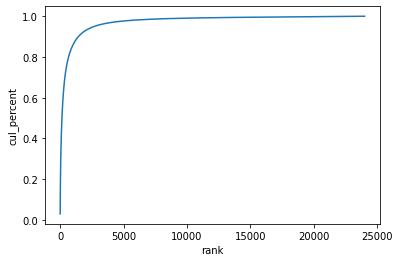

In [ ]:
# lemmatization 후
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real3);

In [ ]:
# lemmatization 후

wc_real3[wc_real3['rank'] <= 1000]['cul_percent'].max()

# wc_real3[wc_real3['rank'] <= 2000]['cul_percent'].max()    ## 0.929
# wc_real3[wc_real3['rank'] <= 2500]['cul_percent'].max()    ## 0.945
# wc_real3[wc_real3['rank'] <= 3000]['cul_percent'].max()    ## 0.956
# wc_real3[wc_real3['rank'] <= 4000]['cul_percent'].max()    ## 0.969
# wc_real3[wc_real3['rank'] <= 5000]['cul_percent'].max()    ## 0.976

0.8581417028354127

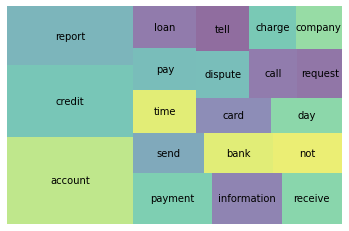

In [ ]:
# lemmatization 후
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real3_top20 = wc_real3[wc_real3['rank'] <= 20]
squarify.plot(sizes=wc_real3_top20['percent'], label=wc_real3_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 불용어 제거만 했을 때는 보이지 않았던 단어가 상위로 올라옴.

In [ ]:
# 문장으로 붙여서 하나의 리스트에 넣기 (wordcloud 만들 때 & 마지막 데이터프레임으로 만들 때 필요)

words_real3_sen = []
for text in df_new['Consumer complaint narrative']:
  words_real3_sen.append(pp_real3_lemma(text))

In [ ]:
# 전처리 함수를 거친 불만사항 99번째 데이터 확인
words_real3_sen[99]

'send letter equifax false negative account credit report send document letter behalf determine credit furnisher verify report mislead suspicious section state failure investigate item day give reason immediately remove item credit report day delete promptly demand account delete immediately file litigation stress cause information impact equifax data breach get hand wrong person report mislead suspicious federal law violation company commit not resolve seek litigation charge violation penalty perjury swear account false misleading usc method verification account violation report valid evidence code e b code account violation report accurateunauthorizederroneous account result equifax data breach direct violation fcra reporting falsely code b exclusions consumer report account violation credit transaction suppose exclude consumer credit report social security card transactioncontacte creditoragency ask proof alleged debt specifically allege original application bearing signature able p

In [ ]:
# 원래 불만사항 99째 데이터 확인 비교
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

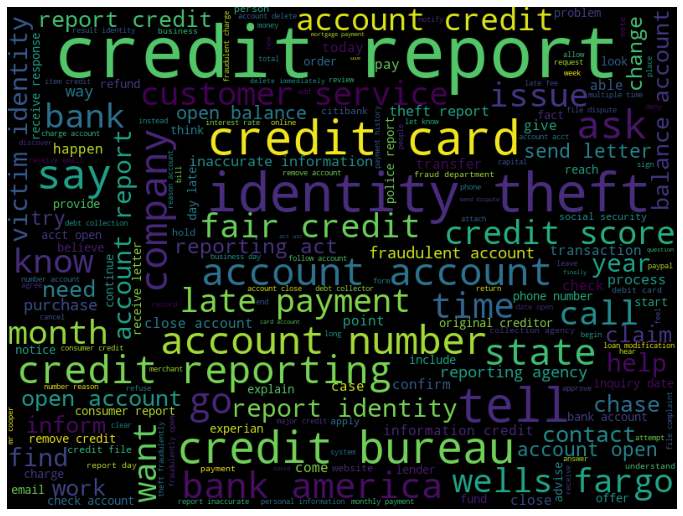

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기 (불용어 제거 & 표제어 추출 후)

cloud = WordCloud(width=800, height=600).generate(" ".join(words_real3_sen))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [ ]:
# 지금까지 전처리한 데이터를 새로운 데이터프레임으로 저장해두기 (불용어 제거 & 표제어 추출 후)

df_clean = pd.DataFrame({'product':df_new['Product'], 'complaint':words_real3_sen})
df_clean.head(3)

# len(df_clean)
# 25126

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...

In [ ]:
df_clean_original = df_clean.copy()

In [ ]:
df_clean_original.head(3)

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...

### **[추가]** PART 4. Contractions 처리(Lemmatization 전)

In [ ]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 -> 다시 join 붙여주기 (불용어 처리 포함 ver.)

def pp_real4_stop(text):

  # contractions 확장 처리
  expanded_text = contractions.fix(text)

  # 영어가 아닌 모든 것(숫자,특수문자 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",expanded_text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]    # 단어 분리
  # clean_complaints = " ".join(words)                  # 문장으로 합침
  
  return words                # 단어 분리
  # return clean_complaints     # 문장으로 합침

In [ ]:
# 단어로 분리할 때

df_new['words_real4_words'] = df_new['Consumer complaint narrative'].apply(pp_real4_stop)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Product                       Consumer complaint narrative  \
0        2  This is XXXX XXXX XXXX, who is submitting this...   
1        3  I am a XXXX XXXX worker, and work at XXXX XXXX...   
2        2  Unfortunately, I am a victim of identity theft...   
3        2  I am a victim of identity theft. I have been a...   
4        2  XXXX. XXXX XXXX XXXX Account Number : XXXX Ple...   

                                   words_real5_words  \
0  [submit, cfpb, complaint, account, report, lat...   
1  [worker, work, covid, mark, late, comenity, ex...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real2_words  \
0  [submitting, cfpb, complaint, accounts, report...   
1  [worker, work, covid, marked, late, comenity, ...   
2  [unfortunately, victim, identity, theft, accou...   
3  [victim, identity, theft, victim, identity, th...   
4  [account, number, correct, inaccurate, informa...   

                                   words_real4_words  
0  [submitting, cfpb, complaint, accounts, report...  
1  [worker, work, covid, marked, late, comenity, ...  
2  [unfortunately, victim, identity, theft, accou...  
3  [victim, identity, theft, victim, identity, th...  
4  [account, number, correct, inaccurate, informa...

In [ ]:
# 전처리 함수 통과후, 각 불만사항 텍스트당 분리된 토큰 갯수
df_new['words_real4_words'].apply(len)

0         23
1        110
2        129
3         25
4        412
        ... 
25121     13
25122     17
25123    120
25124     52
25125     16
Name: words_real4_words, Length: 25126, dtype: int64

In [ ]:
# 단어 카운트 함수 돌려서 top 20 확인하기
wc_real4 = word_count(df_new['words_real4_words'])
wc_real4.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
42        account         11733  42855   1.0  0.023911     0.023911   
105        credit         15628  42784   2.0  0.023871     0.047782   
146        report         11019  20988   3.0  0.011710     0.059492   
46    information          7976  17113   4.0  0.009548     0.069040   
69           bank          4737  12998   5.0  0.007252     0.076292   
37        payment          4508  12567   6.0  0.007012     0.083304   
0       reporting          5480  11884   7.0  0.006631     0.089935   
32           card          4321  11443   8.0  0.006385     0.096319   
427          loan          3630  11392   9.0  0.006356     0.102675   
10       accounts          5724  10714  10.0  0.005978     0.108653   
67       received          6446  10538  11.0  0.005880     0.114533   
414          told          4675   9544  12.0  0.005325     0.119858   
203          time          5681   9476  13.0  0.005287     0.125145   
1389         debt          3220   8833  14.0  0.004928     0.130073   
78           sent          5597   8704  15.0  0.004856     0.134930   
36         number          3953   8447  16.0  0.004713     0.139643   
337        called          4782   8409  17.0  0.004692     0.144334   
66        balance          3449   8297  18.0  0.004629     0.148964   
48           days          4726   8230  19.0  0.004592     0.153556   
450       company          4632   8123  20.0  0.004532     0.158088   

      word_in_docs_percent  
42                0.466966  
105               0.621985  
146               0.438550  
46                0.317440  
69                0.188530  
37                0.179416  
0                 0.218101  
32                0.171973  
427               0.144472  
10                0.227812  
67                0.256547  
414               0.186062  
203               0.226100  
1389              0.128154  
78                0.222757  
36                0.157327  
337               0.190321  
66                0.137268  
48                0.188092  
450               0.184351

In [ ]:
# 'not' 포함 유무 확인 : False
wc_real4.loc[wc_real4['word'] == 'not']

Empty DataFrame
Columns: [word, word_in_docs, count, rank, percent, cul_percent, word_in_docs_percent]
Index: []

In [ ]:
# 어퍼스트로피가 제거된 축약형 형태 단어를 포함 유무 확인
# -> 만약 여기서 발견된다면 원래 말뭉치에서부터 이렇게 적혀있던 단어였다는 소리지?!
# contractions 처리전인 part2와 비교

# dont: 4160 -> 1      # df_new['Consumer complaint narrative'][21252]        # don`t(어퍼스트로피 아님)
# didnt: 2560 -> 2     # df_new['Consumer complaint narrative'][527][20878]   # did'nt(오타)
# cant: 1208 -> 0
# havent: 863 -> 1     # df_new['Consumer complaint narrative'][2121]         # have\'nt (오타)
# wasnt: 807 -> 1      # df_new['Consumer complaint narrative'][14514]        # was'nt (오타)
# couldnt: 784 -> 0
# doesnt: 662 -> 0
# wont: 551 -> 0
# wouldnt: 395 -> 3    # df_new['Consumer complaint narrative'][13183][14514]        # would'nt (오타)
# isnt: 357 -> 0 
# hasnt: 193 -> 0
# hadnt: 160 -> 0
# arent: 130 -> 0
# shouldnt: 199 -> 0
# werent: 112 -> 0
# aint: 11 -> 0
# neednt: 1 -> 0
# mightnt / mustnt / oughtnt: 0

wc_real4.loc[wc_real4['word'] == 'dont']

word  word_in_docs  count     rank       percent  cul_percent  \
25295  dont             1      1  25578.0  5.579457e-07     0.998925   

       word_in_docs_percent  
25295               0.00004

In [ ]:
for i in range(0,len(df_new)):
  if 'wouldnt' in df_new['words_real4_words'][i]:
    print('index:', i, df_new['words_real4_words'][i])

index: 13183 ['deposited', 'day', 'sent', 'landlord', 'rent', 'left', 'balance', 'paypal', 'decided', 'suspicious', 'activity', 'freeze', 'account', 'tried', 'transferring', 'bank', 'linked', 'paypal', 'wouldnt', 'work', 'tried', 'sending', 'balance', 'landlord', 'wouldnt', 'work', 'phone', 'multiple', 'times', 'representatives', 'saying', 'problem', 'fixed', 'able', 'send', 'receive', 'worked', 'frustrating', 'daughter', 'sent', 'selling', 'different', 'things', 'antique', 'dads', 'pocket', 'watches', 'mantle', 'clock', 'different', 'things', 'accumulating', 'years', 'life', 'informed', 'transaction', 'decided', 'hold', 'funds', 'furious', 'company', 'decide', 'hold', 'elses', 'money', 'long', 'need', 'money', 'care', 'acceptable', 'time', 'days', 'extremely', 'inappropriate', 'help', 'happy']
index: 14514 ['brought', 'police', 'want', 'wanted', 'va', 'veteran', 'wouldnt', 'sign', 'admission', 'nurse', 'officer', 'forged', 'paperwork', 'said', 'wasnt', 'able', 'signi', 'explained', 'n

In [ ]:
# 원래 불만사항과 데이터 확인 비교
df_new['Consumer complaint narrative'][13183]

"I deposited XXXX one day. I sent my landlord XXXX for part of my rent and that left a balance of XXXX. PayPal decided that that was suspicious activity and put a freeze on my account. I tried transferring it to my own bank that is linked to my PayPal, it would'nt work. I tried sending the balance to my landlord, it would'nt work. I was on the phone multiple times with representatives saying the problem had been fixed and I should be able to send and receive any amount. Nothing worked. SO VERY FRUSTRATING!!!!!!!!!!!! My daughter sent me XXXX from me selling different things at an antique show. My dads pocket watches and mantle clock and different things I have been accumulating all these XXXX years of my life. I informed them of what each transaction was and they still decided to hold my funds. I am SO FURIOUS. How can a company decide to hold someone elses money??? and for so long???? I need that money for my care. It is not acceptable and the time of 180 days is extremely inappropria

In [ ]:
df_new['words_real4_words'][2121]

['start',
 'called',
 'prepaid',
 'card',
 'declined',
 'stores',
 'told',
 'use',
 'times',
 'cancel',
 'card',
 'work',
 'online',
 'phone',
 'bill',
 'payment',
 'payment',
 'went',
 'tried',
 'didnt',
 'work',
 'called',
 'customer',
 'service',
 'cancel',
 'card',
 'gon',
 'na',
 'send',
 'new',
 'mail',
 'received',
 'new',
 'card',
 'different',
 'number',
 'card',
 'called',
 'installed',
 'card',
 'said',
 'balance',
 'dollars',
 'balance',
 'minus',
 'phone',
 'bill',
 'called',
 'customer',
 'service',
 'said',
 'fraud',
 'card',
 'sense',
 'told',
 'cancel',
 'gon',
 'na',
 'able',
 'use',
 'said',
 'sending',
 'dispute',
 'form',
 'days',
 'double',
 'check',
 'sense',
 'said',
 'cancel',
 'fault',
 'days',
 'later',
 'received',
 'letter',
 'said',
 'check',
 'fill',
 'dispute',
 'funds',
 'gon',
 'na',
 'new',
 'card',
 'checked',
 'balance',
 'called',
 'representative',
 'said',
 'funds',
 'card',
 'got',
 'cancel',
 'sense',
 'said',
 'transfer',
 'funds',
 'days',
 '

In [ ]:
# 'not' 이외에 다른 축약형 형태 단어 포함 유무 확인
# contractions 처리전인 part2와 비교

# not 0 -> 0
# would 0 -> 0
# s: 4796 -> 4796
# be 0 -> 0
# let: 1336 -> 1429
# lets: 93 -> 0
# have: 0 -> 0

# im: 3535 -> 3
# id: 1627 -> 1461
# ive: 2746 -> 5
# ill: 163 -> 93
# ll: 8 -> 7
# youre: 166 -> 0
# theyre: 360 -> 0
# its 0 -> 0

wc_real4.loc[(wc_real4['word'] == 'would') | (wc_real4['word'] == 's') | (wc_real4['word'] == 'be') | (wc_real4['word'] == 'let') | (wc_real4['word'] == 'lets')]

word  word_in_docs  count   rank   percent  cul_percent  \
90    s          2631   4796   43.0  0.002676     0.236837   
12  let          1165   1429  251.0  0.000797     0.519856   

    word_in_docs_percent  
90              0.104712  
12              0.046366

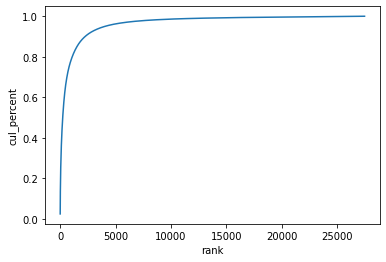

In [ ]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real4);

In [ ]:
# 상위 랭크 몇개가 전체 단어의 몇퍼센트를 차지하는지 확인

wc_real4[wc_real4['rank'] <= 1000]['cul_percent'].max()

# wc_real4[wc_real4['rank'] <= 2000]['cul_percent'].max()    ## 0.886
# wc_real4[wc_real4['rank'] <= 2500]['cul_percent'].max()    ## 0.910
# wc_real4[wc_real4['rank'] <= 3000]['cul_percent'].max()    ## 0.927
# wc_real4[wc_real4['rank'] <= 4000]['cul_percent'].max()    ## 0.949
# wc_real4[wc_real4['rank'] <= 5000]['cul_percent'].max()    ## 0.962

0.7866951144597786

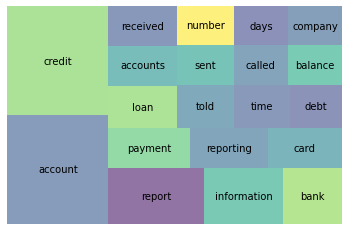

In [ ]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real4_top20 = wc_real4[wc_real4['rank'] <= 20]
squarify.plot(sizes=wc_real4_top20['percent'], label=wc_real4_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 불용어들이 제거되니 의미있는 단어들을 발견할 수 있다.

In [ ]:
# 문장으로 붙여서 하나의 리스트에 넣기 (wordcloud 만들 때 & 마지막 데이터프레임으로 만들 때 필요)

words_real4_sen = []
for text in df_new['Consumer complaint narrative']:
  words_real4_sen.append(pp_real4_stop(text))

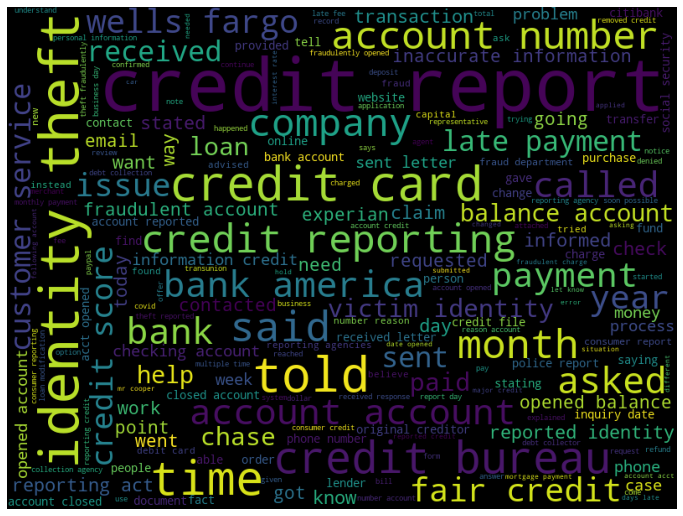

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 워드클라우드로 확인
# '문장으로 붙였을 때' 버전으로 적용해야함!

cloud = WordCloud(width=800, height=600).generate(" ".join(words_real4_sen))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

### **[추가]** PART 5. Contractions 처리(Lemmatization 후)

In [12]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 -> 다시 join 붙여주기 (불용어 처리 포함 ver.)

def pp_real5_lemma(text):

  # contractions 확장 처리
  expanded_text = contractions.fix(text)

  # 영어가 아닌 모든 것(숫자,특수문자 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",expanded_text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]
  clean_complaints = " ".join(words)

  # 표제어 처리 (spaCy)
  doc = en(clean_complaints)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  clean_complaints = " ".join(lemmas)
  
  # return lemmas             # 단어 분리
  return clean_complaints   # 문장으로 합침

In [ ]:
# 단어로 분리할 때

df_new['words_real5_words'] = df_new['Consumer complaint narrative'].apply(pp_real5_lemma)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Product                       Consumer complaint narrative  \
0        2  This is XXXX XXXX XXXX, who is submitting this...   
1        3  I am a XXXX XXXX worker, and work at XXXX XXXX...   
2        2  Unfortunately, I am a victim of identity theft...   
3        2  I am a victim of identity theft. I have been a...   
4        2  XXXX. XXXX XXXX XXXX Account Number : XXXX Ple...   

                                   words_real5_words  
0  [submit, cfpb, complaint, account, report, lat...  
1  [worker, work, covid, mark, late, comenity, ex...  
2  [unfortunately, victim, identity, theft, accou...  
3  [victim, identity, theft, victim, identity, th...  
4  [account, number, correct, inaccurate, informa...

In [ ]:
# 전처리 함수 통과후, 각 불만사항 텍스트당 분리된 토큰 갯수
df_new['words_real5_words'].apply(len)

0         23
1        110
2        129
3         25
4        412
        ... 
25121     13
25122     17
25123    120
25124     52
25125     16
Name: words_real5_words, Length: 25126, dtype: int64

In [ ]:
# 단어 카운트 함수 돌려서 top 20 확인하기
wc_real5 = word_count(df_new['words_real5_words'])
wc_real5.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
10       account         15070  53125   1.0  0.029649     0.029649   
100       credit         15810  43774   2.0  0.024430     0.054080   
12        report         13618  36160   3.0  0.020181     0.074261   
3        payment          5750  19366   4.0  0.010808     0.085069   
41   information          7988  17128   5.0  0.009559     0.094628   
40       receive          8239  14814   6.0  0.008268     0.102896   
107         send          8185  13896   7.0  0.007755     0.110651   
61          bank          4874  13588   8.0  0.007584     0.118235   
188         time          7367  13040   9.0  0.007278     0.125513   
159          pay          6037  12937  10.0  0.007220     0.132733   
377         loan          3975  12873  11.0  0.007184     0.139917   
30          card          4635  12715  12.0  0.007096     0.147014   
27           day          6096  12167  13.0  0.006790     0.153804   
135      dispute          6034  11795  14.0  0.006583     0.160387   
305         tell          5326  11559  15.0  0.006451     0.166838   
296         call          5962  11498  16.0  0.006417     0.173255   
180      request          5728  10596  17.0  0.005914     0.179169   
418       charge          3805   9527  18.0  0.005317     0.184486   
386      company          5312   9509  19.0  0.005307     0.189793   
26           say          4729   9385  20.0  0.005238     0.195031   

     word_in_docs_percent  
10               0.599777  
100              0.629229  
12               0.541988  
3                0.228847  
41               0.317918  
40               0.327907  
107              0.325758  
61               0.193982  
188              0.293202  
159              0.240269  
377              0.158203  
30               0.184470  
27               0.242617  
135              0.240150  
305              0.211972  
296              0.237284  
180              0.227971  
418              0.151437  
386              0.211414  
26               0.188211

In [ ]:
# wc_real5_edit = wc_real5.reset_index(drop=True)
wc_real5_edit.loc[1:50]

word  word_in_docs  count  rank   percent  cul_percent  \
1        credit         15810  43774   2.0  0.024430     0.054080   
2        report         13618  36160   3.0  0.020181     0.074261   
3       payment          5750  19366   4.0  0.010808     0.085069   
4   information          7988  17128   5.0  0.009559     0.094628   
5       receive          8239  14814   6.0  0.008268     0.102896   
6          send          8185  13896   7.0  0.007755     0.110651   
7          bank          4874  13588   8.0  0.007584     0.118235   
8          time          7367  13040   9.0  0.007278     0.125513   
9           pay          6037  12937  10.0  0.007220     0.132733   
10         loan          3975  12873  11.0  0.007184     0.139917   
11         card          4635  12715  12.0  0.007096     0.147014   
12          day          6096  12167  13.0  0.006790     0.153804   
13      dispute          6034  11795  14.0  0.006583     0.160387   
14         tell          5326  11559  15.0  0.006451     0.166838   
15         call          5962  11498  16.0  0.006417     0.173255   
16      request          5728  10596  17.0  0.005914     0.179169   
17       charge          3805   9527  18.0  0.005317     0.184486   
18      company          5312   9509  19.0  0.005307     0.189793   
19          say          4729   9385  20.0  0.005238     0.195031   
20       letter          5324   9359  21.0  0.005223     0.200254   
21         debt          3341   9326  22.0  0.005205     0.205459   
22       number          4278   9266  23.0  0.005171     0.210630   
23     consumer          2973   8931  24.0  0.004984     0.215615   
24       remove          6085   8926  25.0  0.004982     0.220596   
25      balance          3573   8638  26.0  0.004821     0.225417   
26         open          4250   8457  27.0  0.004720     0.230137   
27          ask          4898   8135  28.0  0.004540     0.234677   
28         file          5265   8130  29.0  0.004537     0.239215   
29     identity          3449   8022  30.0  0.004477     0.243692   
30      provide          4399   7864  31.0  0.004389     0.248081   
31         date          3826   7783  32.0  0.004344     0.252424   
32        theft          2996   7488  33.0  0.004179     0.256603   
33        money          3760   7486  34.0  0.004178     0.260781   
34        state          4519   7473  35.0  0.004171     0.264952   
35        month          4141   7107  36.0  0.003966     0.268919   
36      contact          4573   7089  37.0  0.003956     0.272875   
37        check          3150   7013  38.0  0.003914     0.276789   
38        email          3049   6638  39.0  0.003705     0.280494   
39         late          2942   6531  40.0  0.003645     0.284139   
40          try          4660   6364  41.0  0.003552     0.287690   
41    reporting          3721   6156  42.0  0.003436     0.291126   
42      service          3784   6108  43.0  0.003409     0.294535   
43         need          4439   6018  44.0  0.003359     0.297894   
44        phone          3415   5926  45.0  0.003307     0.301201   
45      inquiry          2103   5925  46.0  0.003307     0.304508   
46        claim          2757   5864  47.0  0.003273     0.307781   
47     mortgage          2091   5752  48.0  0.003210     0.310991   
48         year          3706   5681  49.0  0.003171     0.314161   
49          get          4184   5520  50.0  0.003081     0.317242   
50        issue          3549   5518  51.0  0.003080     0.320322   

    word_in_docs_percent  
1               0.629229  
2               0.541988  
3               0.228847  
4               0.317918  
5               0.327907  
6               0.325758  
7               0.193982  
8               0.293202  
9               0.240269  
10              0.158203  
11              0.184470  
12              0.242617  
13              0.240150  
14              0.211972  
15              0.237284  
16              0.227971  
17              0.151437  
18   

In [ ]:
# 'not' 포함 유무 확인 : True 
# -> 만약 여기서 발견되면 위에 part4에서 발견된 부정문 축약형 형태들에 대해 처리된것.

wc_real5.loc[wc_real5['word'] == 'not']

word  word_in_docs  count    rank   percent  cul_percent  \
3782  not             7      9  5312.0  0.000005     0.978214   

      word_in_docs_percent  
3782              0.000279

In [ ]:
# 'not' 이외에 다른 축약형 형태 단어 포함 유무 확인
# contractions 처리전인 part3와 비교

# not: 13461 -> 9         
# would: 1742 -> 1480
# s: 5963 -> 4739
# be: 3546 -> 3
# let: 1549 -> 1558
# lets: 9 -> 0
# have: 5100 -> 1909

# im: 0 -> 0
# youre: 0 -> 0
# its: 0 -> 0
# ive: 0 -> 0
# ill: 163 -> 93
# ll: 0 -> 0
# re: 2 -> 3
# id: 14 -> 14

wc_real5.loc[(wc_real5['word'] == 'not') | (wc_real5['word'] == 'would') | (wc_real5['word'] == 's') | (wc_real5['word'] == 'be') | (wc_real5['word'] == 'let')]

word  word_in_docs  count    rank   percent  cul_percent  \
85         s          2615   4739    66.0  0.002645     0.362971   
9        let          1257   1558   233.0  0.000870     0.603891   
58     would          1041   1480   247.0  0.000826     0.615823   
3782     not             7      9  5312.0  0.000005     0.978214   
12016     be             3      3  9120.0  0.000002     0.989298   

       word_in_docs_percent  
85                 0.104075  
9                  0.050028  
58                 0.041431  
3782               0.000279  
12016              0.000119

In [ ]:
##### 결과 : lemmatization 전/후 비교 #####

# (1) 명사 복수형, 동사 과거형 통일됨.
# acount, accounts -> account
# report, reporting -> report
# received -> receive
# told -> tell
# sent -> send
# called -> call
# days -> day

# (2) 사라진 단어
# debt
# number
# balance

# (3) 새로 올라온 단어
# pay
# dispute
# request
# charge
# say  ------------------> part3에서도 없던 단어인데 완전 새로 올라옴

In [ ]:
##### 결과 : contractions 전/후 비교 #####
# 'not' 이 top 20 에서 사라짐 끝.

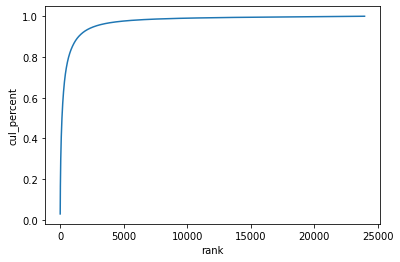

In [ ]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real5);

In [ ]:
# 상위 랭크 몇개가 전체 단어의 몇퍼센트를 차지하는지 확인

wc_real5[wc_real5['rank'] <= 1000]['cul_percent'].max()

# wc_real5[wc_real5['rank'] <= 2000]['cul_percent'].max()    ## 0.929
# wc_real5[wc_real5['rank'] <= 2500]['cul_percent'].max()    ## 0.945
# wc_real5[wc_real5['rank'] <= 3000]['cul_percent'].max()    ## 0.955
# wc_real5[wc_real5['rank'] <= 4000]['cul_percent'].max()    ## 0.968
# wc_real5[wc_real5['rank'] <= 5000]['cul_percent'].max()    ## 0.976

0.8568390092533681

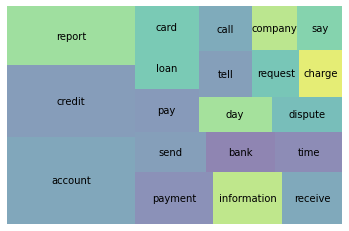

In [ ]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real5_top20 = wc_real5[wc_real5['rank'] <= 20]
squarify.plot(sizes=wc_real5_top20['percent'], label=wc_real5_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [13]:
# 문장으로 붙여서 하나의 리스트에 넣기 (wordcloud 만들 때 & 마지막 데이터프레임으로 만들 때 필요)

words_real5_sen = []
for text in df_new['Consumer complaint narrative']:
  words_real5_sen.append(pp_real5_lemma(text))

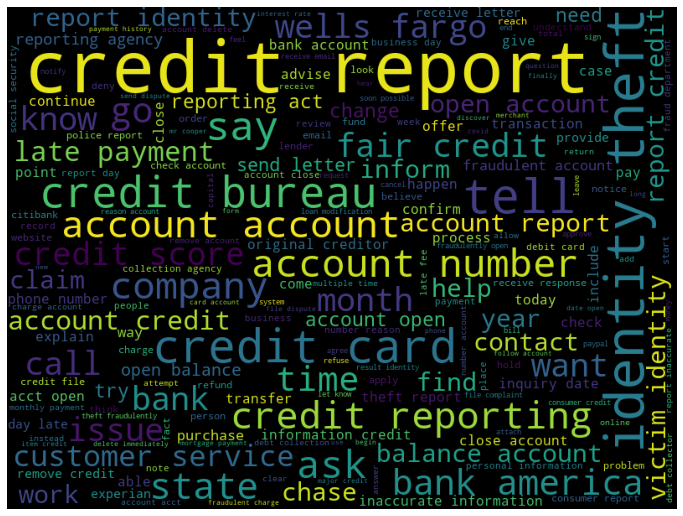

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 워드클라우드로 확인
# '문장으로 붙였을 때' 버전으로 적용해야함!

cloud = WordCloud(width=800, height=600).generate(" ".join(words_real5_sen))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [14]:
# 지금까지 전처리한 데이터를 새로운 데이터프레임으로 저장해두기 (+ 축약형 확장 & 불용어 제거 & 표제어 추출 후)

df_clean5 = pd.DataFrame({'product':df_new['Product'], 'complaint':words_real5_sen})
df_clean5.head(3)

# len(df_clean5)
# 25126

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...

In [15]:
df_clean5_original = df_clean5.copy()
df_clean5_original.head(3)

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...

### **[추가]** PART 6. 불용어 제거 2차

# **모델 구축**

## **1) 데이터 분리 & 벡터화**

In [16]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Dense, Activation, Dropout, Input, Layer
from tensorflow.keras.layers import SimpleRNN, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# 데이터셋 분리

target = 'product'
feature = 'complaint'

X_train, X_test, y_train, y_test = train_test_split(df_clean5[feature], df_clean5[target], test_size=0.2, stratify=df_clean5[target], random_state=42)  # 타겟 클래스의 불균형을 고려해서 분리

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20100,)
(5026,)
(20100,)
(5026,)


In [19]:
# train 데이터의 타겟 클래스 비율

y_train.value_counts(normalize=True)

2    0.503483
3    0.147214
1    0.102189
5    0.089055
0    0.074876
4    0.044080
8    0.018408
6    0.012537
7    0.008159
Name: product, dtype: float64

In [20]:
# test 데이터의 타겟 클래스 비율

y_test.value_counts(normalize=True)

2    0.503581
3    0.147234
1    0.102268
5    0.088938
0    0.074811
4    0.044170
8    0.018305
6    0.012535
7    0.008158
Name: product, dtype: float64

In [21]:
max_words = 10000    ## 가장 빈도높은 10000개 단어만 사용

tokenizer = Tokenizer(num_words=max_words)       ## Tokenizer 객체 만들기 (한번만 만들기, 원래는 +1 해주어야함 왜냐하면 케라스 패딩때문에?, 지금 안해주었으니까 결과적으로 최빈단어 9999개에 단어만 사용하게 될것.)
tokenizer.fit_on_texts(X_train)                  ## 정수 인덱스 구축하기 by 빈도수 높은 단어가 낮은 숫자 순으로 매칭 됨. (리스트 형태가 입력되어야하고, 학습데이터에만 적용하여야 한다. 테스트데이터에도 따로 해주면 인덱스 자체가 달려져서 모델에 정상적으로 적용 불가)
word_vocab = tokenizer.word_index                ## 정수 인덱스 매칭이 완료된 어휘집합 확인하기
word_count = tokenizer.word_counts               ## 각 단어 빈도수 확인하기

In [22]:
print('어휘집합: ', word_vocab)
print('어휘집합 내 단어갯수: ', len(word_vocab))

## num_word = 10000 인데, 왜 word_index는 10000개가 넘는 걸까? 10000개 갖고만 만들어주는거 아니었어?
## num_words =3 이든 num_words=100 이든, word_index는 같은 아웃풋을 낸다. 왜나면 word_index는 단순히 num_words가 몇이냐에 관계없이 최초 말뭉치 전체에 대해 매핑한다.
## num_words 는 texts_to_sequences 를 호출할 때 반영되는 것! 

어휘집합:  {'account': 1, 'credit': 2, 'report': 3, 'payment': 4, 'information': 5, 'receive': 6, 'send': 7, 'bank': 8, 'time': 9, 'pay': 10, 'loan': 11, 'card': 12, 'day': 13, 'dispute': 14, 'tell': 15, 'call': 16, 'request': 17, 'letter': 18, 'company': 19, 'debt': 20, 'charge': 21, 'say': 22, 'number': 23, 'consumer': 24, 'remove': 25, 'balance': 26, 'open': 27, 'file': 28, 'ask': 29, 'provide': 30, 'identity': 31, 'date': 32, 'state': 33, 'money': 34, 'theft': 35, 'month': 36, 'check': 37, 'contact': 38, 'email': 39, 'late': 40, 'try': 41, 'reporting': 42, 'service': 43, 'phone': 44, 'need': 45, 'claim': 46, 'inquiry': 47, 'mortgage': 48, 'year': 49, 'issue': 50, 'get': 51, 'collection': 52, 'fraudulent': 53, 'go': 54, 'creditor': 55, 'fraud': 56, 'know': 57, 'address': 58, 'take': 59, 'close': 60, 'complaint': 61, 'item': 62, 'help': 63, 'statement': 64, 'agency': 65, 'give': 66, 's': 67, 'inaccurate': 68, 'act': 69, 'customer': 70, 'transaction': 71, 'response': 72, 'document': 73, '

In [23]:
print('어휘집합: ', sorted(word_count.items(), key=lambda x: x[1], reverse=True))
print('어휘집합 내 단어갯수: ', len(word_count))

어휘집합:  [('account', 42397), ('credit', 35125), ('report', 28864), ('payment', 15491), ('information', 13735), ('receive', 12026), ('send', 11214), ('bank', 10784), ('time', 10461), ('pay', 10428), ('loan', 10423), ('card', 10233), ('day', 9911), ('dispute', 9496), ('tell', 9252), ('call', 9207), ('request', 8528), ('letter', 7608), ('company', 7603), ('debt', 7596), ('charge', 7594), ('say', 7544), ('number', 7503), ('consumer', 7285), ('remove', 7127), ('balance', 6824), ('open', 6686), ('file', 6561), ('ask', 6464), ('provide', 6338), ('identity', 6281), ('date', 6245), ('state', 6110), ('money', 5975), ('theft', 5831), ('month', 5700), ('check', 5668), ('contact', 5662), ('email', 5310), ('late', 5164), ('try', 5089), ('reporting', 4931), ('service', 4903), ('phone', 4778), ('need', 4770), ('claim', 4736), ('inquiry', 4734), ('mortgage', 4656), ('year', 4481), ('issue', 4467), ('get', 4439), ('collection', 4409), ('fraudulent', 4361), ('go', 4358), ('creditor', 4337), ('fraud', 4211

In [24]:
train_text_seq = tokenizer.texts_to_sequences(X_train)    ## train 데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기
test_text_seq = tokenizer.texts_to_sequences(X_test)      ## test  데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기

print(train_text_seq[0])

[90, 25, 53, 1, 2, 3]


In [25]:
max_features = 10000
maxlen = 120    # 텍스트 하나당 단어 갯수 중간값 = 119 / 혹은 최대값? 혹은 뭐가 적당할까?

In [26]:
train_seq_matrix = pad_sequences(train_text_seq, maxlen=maxlen)    ## train 데이터 pad_sequence 를 통해 패딩 처리
test_seq_matrix = pad_sequences(test_text_seq, maxlen=maxlen)    ## test 데이터 pad_sequence 를 통해 패딩 처리

print(train_seq_matrix[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 90 25 53  1  2  3]


## **2) 모델 학습**

### **SimpleRNN / 임베딩차원 = 32 / 배치사이즈 = 128**

In [27]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 9)                 297       
                                                                 
Total params: 322,377
Trainable params: 322,377
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 7s 42ms/step - loss: 1.5361 - accuracy: 0.5044 - val_loss: 1.2891 - val_accuracy: 0.5396
Epoch 2/15
126/126 [==============================] - 5s 40ms/step - loss: 1.1348 - accuracy: 0.5998 - val_loss: 1.0508 - val_accuracy: 0.6269
Epoch 3/15
126/126 [==============================] - 5s 39ms/step - loss: 0.9032 - accuracy: 0.6994 - val_loss: 0.9357 - val_accuracy: 0.6821
Epoch 4/15
126/126 [==============================] - 5s 40ms/step - loss: 0.7509 - accuracy: 0.7602 - val_loss: 0.8282 - val_accuracy: 0.7249
Epoch 5/15
126/126 [==============================] - 5s 39ms/step - loss: 0.6296 - accuracy: 0.8066 - val_loss: 0.7881 - val_accuracy: 0.7480
Epoch 6/15
126/126 [==============================] - 5s 41ms/step - loss: 0.5472 - accuracy: 0.8351 - val_loss: 0.7778 - val_accuracy: 0.7532
Epoch 7/15
126/126 [==============================] - 5s 40ms/step - loss: 0.4843 - accuracy: 0.8516 - val_loss: 0.7907 - val_accuracy: 0.7468

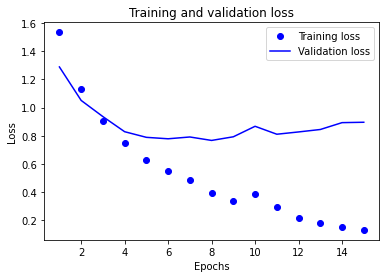

In [29]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

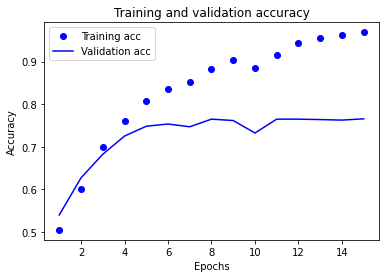

In [30]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **SimpleRNN / 임베딩차원 = 64 / 배치사이즈 = 128**

In [31]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 648,841
Trainable params: 648,841
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 9s 66ms/step - loss: 1.3700 - accuracy: 0.5378 - val_loss: 1.1351 - val_accuracy: 0.5731
Epoch 2/15
126/126 [==============================] - 8s 63ms/step - loss: 1.0010 - accuracy: 0.6452 - val_loss: 1.0176 - val_accuracy: 0.6269
Epoch 3/15
126/126 [==============================] - 8s 63ms/step - loss: 0.8243 - accuracy: 0.7299 - val_loss: 0.8400 - val_accuracy: 0.7172
Epoch 4/15
126/126 [==============================] - 8s 63ms/step - loss: 0.6248 - accuracy: 0.8013 - val_loss: 0.8093 - val_accuracy: 0.7234
Epoch 5/15
126/126 [==============================] - 8s 64ms/step - loss: 0.5108 - accuracy: 0.8391 - val_loss: 0.7821 - val_accuracy: 0.7405
Epoch 6/15
126/126 [==============================] - 8s 64ms/step - loss: 0.4139 - accuracy: 0.8774 - val_loss: 0.7462 - val_accuracy: 0.7585
Epoch 7/15
126/126 [==============================] - 8s 64ms/step - loss: 0.3207 - accuracy: 0.9098 - val_loss: 0.7678 - val_accuracy: 0.7562

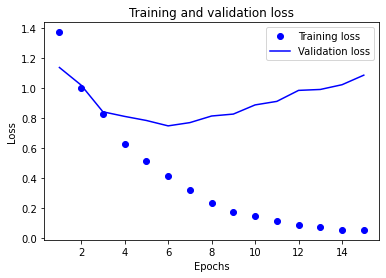

In [33]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

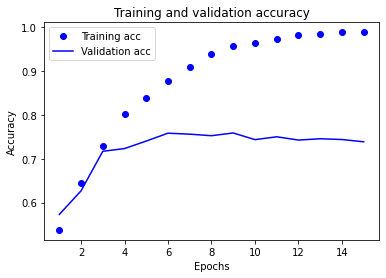

In [34]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **SimpleRNN / 임베딩차원 = 128 / 배치사이즈 = 128**

In [35]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 1,314,057
Trainable params: 1,314,057
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 17s 129ms/step - loss: 1.3997 - accuracy: 0.5099 - val_loss: 1.0760 - val_accuracy: 0.5923
Epoch 2/15
126/126 [==============================] - 16s 127ms/step - loss: 0.8388 - accuracy: 0.7219 - val_loss: 0.8589 - val_accuracy: 0.6968
Epoch 3/15
126/126 [==============================] - 16s 127ms/step - loss: 0.4990 - accuracy: 0.8450 - val_loss: 0.8270 - val_accuracy: 0.7197
Epoch 4/15
126/126 [==============================] - 16s 126ms/step - loss: 0.2654 - accuracy: 0.9299 - val_loss: 0.8457 - val_accuracy: 0.7276
Epoch 5/15
126/126 [==============================] - 16s 127ms/step - loss: 0.1403 - accuracy: 0.9674 - val_loss: 0.8852 - val_accuracy: 0.7371
Epoch 6/15
126/126 [==============================] - 16s 127ms/step - loss: 0.0833 - accuracy: 0.9836 - val_loss: 1.0021 - val_accuracy: 0.7211
Epoch 7/15
126/126 [==============================] - 16s 127ms/step - loss: 0.0579 - accuracy: 0.9887 - val_loss: 1.0750 - val_ac

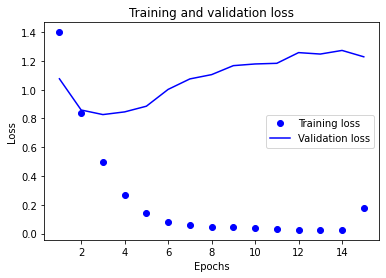

In [37]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

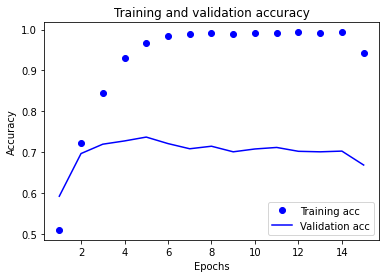

In [38]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 32 / 배치사이즈 = 128**

In [39]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 9)                 297       
                                                                 
Total params: 328,617
Trainable params: 328,617
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 14s 88ms/step - loss: 1.4972 - accuracy: 0.5123 - val_loss: 1.1850 - val_accuracy: 0.5572
Epoch 2/15
126/126 [==============================] - 10s 82ms/step - loss: 1.0182 - accuracy: 0.6414 - val_loss: 0.9468 - val_accuracy: 0.6816
Epoch 3/15
126/126 [==============================] - 10s 82ms/step - loss: 0.7899 - accuracy: 0.7460 - val_loss: 0.7580 - val_accuracy: 0.7567
Epoch 4/15
126/126 [==============================] - 11s 84ms/step - loss: 0.6000 - accuracy: 0.8089 - val_loss: 0.7260 - val_accuracy: 0.7689
Epoch 5/15
126/126 [==============================] - 11s 84ms/step - loss: 0.5144 - accuracy: 0.8387 - val_loss: 0.7102 - val_accuracy: 0.7734
Epoch 6/15
126/126 [==============================] - 11s 83ms/step - loss: 0.4623 - accuracy: 0.8566 - val_loss: 0.6741 - val_accuracy: 0.7960
Epoch 7/15
126/126 [==============================] - 10s 83ms/step - loss: 0.4108 - accuracy: 0.8700 - val_loss: 0.6821 - val_accuracy:

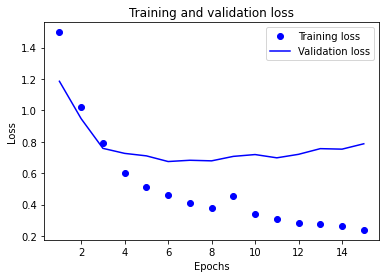

In [41]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

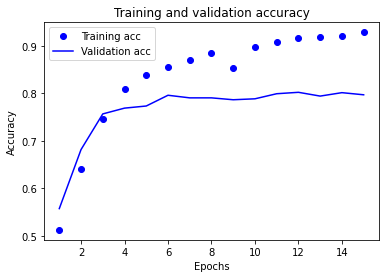

In [42]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 64 / 배치사이즈 = 128**

In [43]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 673,609
Trainable params: 673,609
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 22s 159ms/step - loss: 1.4056 - accuracy: 0.5328 - val_loss: 1.0570 - val_accuracy: 0.6368
Epoch 2/15
126/126 [==============================] - 19s 155ms/step - loss: 0.8752 - accuracy: 0.7085 - val_loss: 0.8005 - val_accuracy: 0.7241
Epoch 3/15
126/126 [==============================] - 19s 154ms/step - loss: 0.6207 - accuracy: 0.7947 - val_loss: 0.6539 - val_accuracy: 0.7928
Epoch 4/15
126/126 [==============================] - 20s 156ms/step - loss: 0.4998 - accuracy: 0.8404 - val_loss: 0.6477 - val_accuracy: 0.7940
Epoch 5/15
126/126 [==============================] - 19s 154ms/step - loss: 0.4254 - accuracy: 0.8676 - val_loss: 0.6649 - val_accuracy: 0.7980
Epoch 6/15
126/126 [==============================] - 19s 154ms/step - loss: 0.3675 - accuracy: 0.8884 - val_loss: 0.6285 - val_accuracy: 0.8047
Epoch 7/15
126/126 [==============================] - 19s 154ms/step - loss: 0.3195 - accuracy: 0.9016 - val_loss: 0.6406 - val_ac

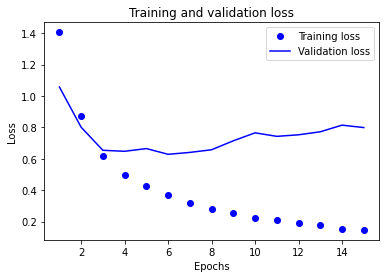

In [45]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

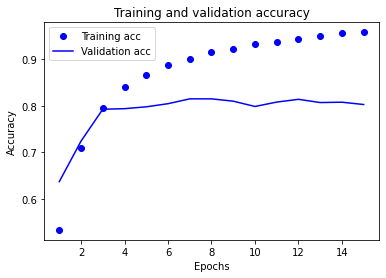

In [46]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 128 / 배치사이즈 = 128**

In [47]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 1,412,745
Trainable params: 1,412,745
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 61s 469ms/step - loss: 1.2424 - accuracy: 0.5772 - val_loss: 0.9751 - val_accuracy: 0.6831
Epoch 2/15
126/126 [==============================] - 58s 464ms/step - loss: 0.7408 - accuracy: 0.7580 - val_loss: 0.6798 - val_accuracy: 0.7851
Epoch 3/15
126/126 [==============================] - 58s 463ms/step - loss: 0.5454 - accuracy: 0.8285 - val_loss: 0.6813 - val_accuracy: 0.7900
Epoch 4/15
126/126 [==============================] - 58s 463ms/step - loss: 0.4590 - accuracy: 0.8569 - val_loss: 0.6151 - val_accuracy: 0.8137
Epoch 5/15
126/126 [==============================] - 59s 465ms/step - loss: 0.3701 - accuracy: 0.8859 - val_loss: 0.6627 - val_accuracy: 0.8032
Epoch 6/15
126/126 [==============================] - 58s 464ms/step - loss: 0.3295 - accuracy: 0.8987 - val_loss: 0.6520 - val_accuracy: 0.8075
Epoch 7/15
126/126 [==============================] - 58s 464ms/step - loss: 0.2826 - accuracy: 0.9118 - val_loss: 0.6779 - val_ac

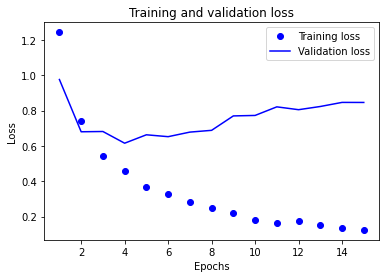

In [49]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

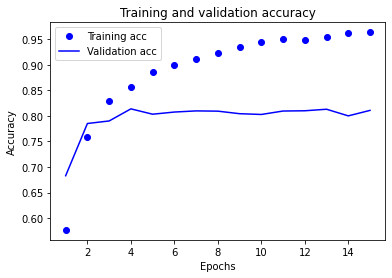

In [50]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN / 임베딩차원 = 32 / 필터수 = 32 / 배치사이즈 = 128**

In [ ]:
num_filters = 32
kernel_size = 3

In [51]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          3104      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 9)                 297       
                                                                 
Total params: 323,401
Trainable params: 323,401
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 4s 24ms/step - loss: 1.5926 - accuracy: 0.4913 - val_loss: 1.1104 - val_accuracy: 0.6373
Epoch 2/15
126/126 [==============================] - 3s 23ms/step - loss: 0.8888 - accuracy: 0.7033 - val_loss: 0.7832 - val_accuracy: 0.7368
Epoch 3/15
126/126 [==============================] - 3s 22ms/step - loss: 0.6822 - accuracy: 0.7724 - val_loss: 0.6662 - val_accuracy: 0.7764
Epoch 4/15
126/126 [==============================] - 3s 23ms/step - loss: 0.5732 - accuracy: 0.8088 - val_loss: 0.6086 - val_accuracy: 0.7990
Epoch 5/15
126/126 [==============================] - 3s 23ms/step - loss: 0.5001 - accuracy: 0.8356 - val_loss: 0.5753 - val_accuracy: 0.8097
Epoch 6/15
126/126 [==============================] - 3s 22ms/step - loss: 0.4407 - accuracy: 0.8575 - val_loss: 0.5518 - val_accuracy: 0.8197
Epoch 7/15
126/126 [==============================] - 3s 24ms/step - loss: 0.3880 - accuracy: 0.8774 - val_loss: 0.5334 - val_accuracy: 0.8284

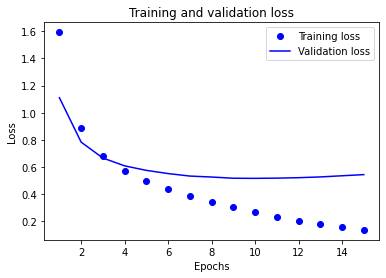

In [53]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

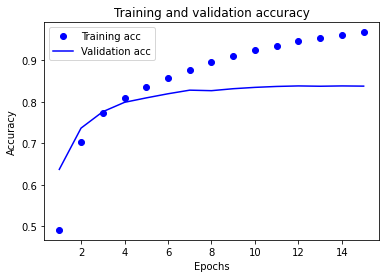

In [54]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN / 임베딩차원 = 64 / 필터수 = 32 / 배치사이즈 = 128**

In [ ]:
num_filters = 32
kernel_size = 3

In [55]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          640000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          6176      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 9)                 297       
                                                                 
Total params: 646,473
Trainable params: 646,473
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 5s 38ms/step - loss: 1.5210 - accuracy: 0.5193 - val_loss: 0.9937 - val_accuracy: 0.6985
Epoch 2/15
126/126 [==============================] - 5s 36ms/step - loss: 0.7900 - accuracy: 0.7438 - val_loss: 0.7130 - val_accuracy: 0.7587
Epoch 3/15
126/126 [==============================] - 5s 36ms/step - loss: 0.6052 - accuracy: 0.7950 - val_loss: 0.6321 - val_accuracy: 0.7886
Epoch 4/15
126/126 [==============================] - 5s 36ms/step - loss: 0.5044 - accuracy: 0.8335 - val_loss: 0.5912 - val_accuracy: 0.8047
Epoch 5/15
126/126 [==============================] - 5s 36ms/step - loss: 0.4240 - accuracy: 0.8650 - val_loss: 0.5633 - val_accuracy: 0.8139
Epoch 6/15
126/126 [==============================] - 5s 36ms/step - loss: 0.3551 - accuracy: 0.8915 - val_loss: 0.5436 - val_accuracy: 0.8224
Epoch 7/15
126/126 [==============================] - 5s 36ms/step - loss: 0.2957 - accuracy: 0.9127 - val_loss: 0.5337 - val_accuracy: 0.8299

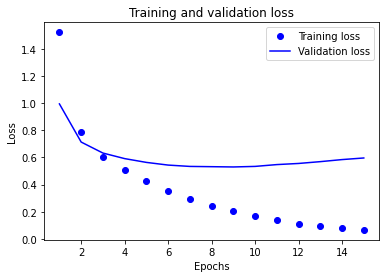

In [57]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

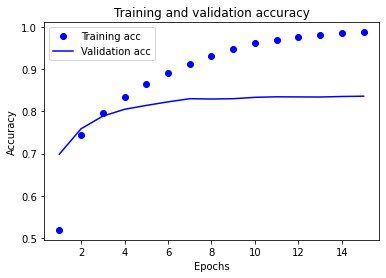

In [58]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN / 임베딩차원 = 128 / 필터수 = 32 / 배치사이즈 = 128**

In [59]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          12320     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 9)                 297       
                                                                 
Total params: 1,292,617
Trainable params: 1,292,617
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 9s 66ms/step - loss: 1.3666 - accuracy: 0.5637 - val_loss: 0.8745 - val_accuracy: 0.7197
Epoch 2/15
126/126 [==============================] - 8s 65ms/step - loss: 0.7111 - accuracy: 0.7753 - val_loss: 0.6588 - val_accuracy: 0.7866
Epoch 3/15
126/126 [==============================] - 8s 65ms/step - loss: 0.5337 - accuracy: 0.8292 - val_loss: 0.5819 - val_accuracy: 0.8090
Epoch 4/15
126/126 [==============================] - 8s 65ms/step - loss: 0.4225 - accuracy: 0.8669 - val_loss: 0.5440 - val_accuracy: 0.8214
Epoch 5/15
126/126 [==============================] - 8s 65ms/step - loss: 0.3346 - accuracy: 0.8980 - val_loss: 0.5253 - val_accuracy: 0.8328
Epoch 6/15
126/126 [==============================] - 8s 64ms/step - loss: 0.2618 - accuracy: 0.9244 - val_loss: 0.5149 - val_accuracy: 0.8396
Epoch 7/15
126/126 [==============================] - 8s 64ms/step - loss: 0.2031 - accuracy: 0.9446 - val_loss: 0.5158 - val_accuracy: 0.8376

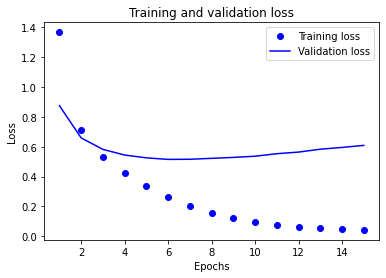

In [61]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

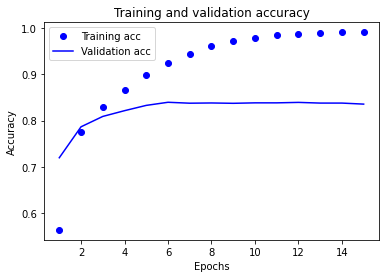

In [62]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN + LSTM / 임베딩차원 = 32 / 필터수 = 32 / 배치사이즈 = 128**

In [63]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 9)                 297       
                                                                 
Total params: 331,721
Trainable params: 331,721
Non-trainable params: 0
________________________________________________

In [64]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 11s 69ms/step - loss: 1.4785 - accuracy: 0.5150 - val_loss: 1.1112 - val_accuracy: 0.5774
Epoch 2/15
126/126 [==============================] - 8s 64ms/step - loss: 0.9590 - accuracy: 0.6711 - val_loss: 0.8196 - val_accuracy: 0.7249
Epoch 3/15
126/126 [==============================] - 8s 65ms/step - loss: 0.6815 - accuracy: 0.7802 - val_loss: 0.7258 - val_accuracy: 0.7649
Epoch 4/15
126/126 [==============================] - 8s 65ms/step - loss: 0.5656 - accuracy: 0.8226 - val_loss: 0.6875 - val_accuracy: 0.7796
Epoch 5/15
126/126 [==============================] - 8s 65ms/step - loss: 0.4836 - accuracy: 0.8521 - val_loss: 0.6976 - val_accuracy: 0.7846
Epoch 6/15
126/126 [==============================] - 8s 65ms/step - loss: 0.4218 - accuracy: 0.8716 - val_loss: 0.6566 - val_accuracy: 0.7973
Epoch 7/15
126/126 [==============================] - 8s 65ms/step - loss: 0.3678 - accuracy: 0.8922 - val_loss: 0.6693 - val_accuracy: 0.797

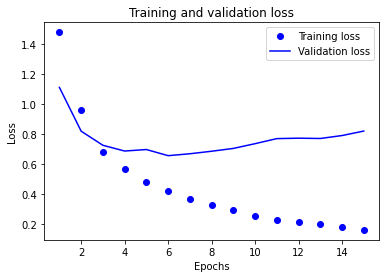

In [65]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

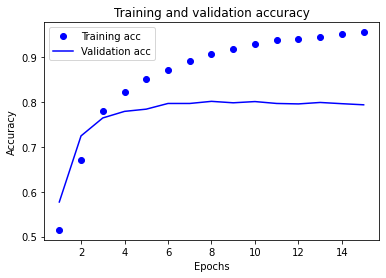

In [66]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN + LSTM / 임베딩차원 = 64 / 필터수 = 32 / 배치사이즈 = 128**

In [67]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          640000    
                                                                 
 conv1d_4 (Conv1D)           (None, None, 32)          6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 9)                 297       
                                                                 
Total params: 654,793
Trainable params: 654,793
Non-trainable params: 0
_______________________________________________

In [68]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 15s 90ms/step - loss: 1.4105 - accuracy: 0.5420 - val_loss: 1.0795 - val_accuracy: 0.6025
Epoch 2/15
126/126 [==============================] - 10s 80ms/step - loss: 0.9233 - accuracy: 0.6826 - val_loss: 0.8292 - val_accuracy: 0.7318
Epoch 3/15
126/126 [==============================] - 11s 85ms/step - loss: 0.6671 - accuracy: 0.7990 - val_loss: 0.6875 - val_accuracy: 0.7846
Epoch 4/15
126/126 [==============================] - 10s 77ms/step - loss: 0.5294 - accuracy: 0.8371 - val_loss: 0.6387 - val_accuracy: 0.7970
Epoch 5/15
126/126 [==============================] - 10s 80ms/step - loss: 0.4491 - accuracy: 0.8655 - val_loss: 0.6193 - val_accuracy: 0.8077
Epoch 6/15
126/126 [==============================] - 10s 79ms/step - loss: 0.3799 - accuracy: 0.8843 - val_loss: 0.6239 - val_accuracy: 0.7988
Epoch 7/15
126/126 [==============================] - 10s 77ms/step - loss: 0.3230 - accuracy: 0.9056 - val_loss: 0.6452 - val_accuracy:

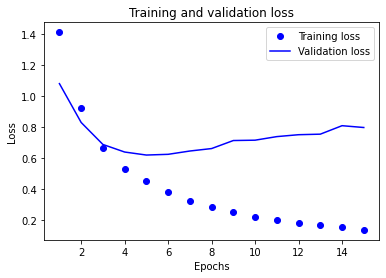

In [69]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

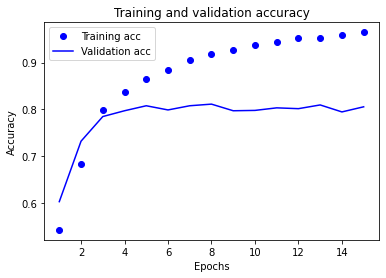

In [70]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **CNN + LSTM / 임베딩차원 = 128 / 필터수 = 32 / 배치사이즈 = 128**

In [71]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_5 (Conv1D)           (None, None, 32)          12320     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 9)                 297       
                                                                 
Total params: 1,300,937
Trainable params: 1,300,937
Non-trainable params: 0
___________________________________________

In [72]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 16s 108ms/step - loss: 1.4018 - accuracy: 0.5374 - val_loss: 1.0464 - val_accuracy: 0.6403
Epoch 2/15
126/126 [==============================] - 13s 103ms/step - loss: 0.7827 - accuracy: 0.7452 - val_loss: 0.7069 - val_accuracy: 0.7721
Epoch 3/15
126/126 [==============================] - 14s 113ms/step - loss: 0.5573 - accuracy: 0.8248 - val_loss: 0.6389 - val_accuracy: 0.7945
Epoch 4/15
126/126 [==============================] - 14s 113ms/step - loss: 0.4476 - accuracy: 0.8593 - val_loss: 0.6276 - val_accuracy: 0.8117
Epoch 5/15
126/126 [==============================] - 14s 112ms/step - loss: 0.3687 - accuracy: 0.8860 - val_loss: 0.6152 - val_accuracy: 0.8134
Epoch 6/15
126/126 [==============================] - 14s 113ms/step - loss: 0.3075 - accuracy: 0.9084 - val_loss: 0.6252 - val_accuracy: 0.8167
Epoch 7/15
126/126 [==============================] - 14s 112ms/step - loss: 0.2624 - accuracy: 0.9244 - val_loss: 0.6611 - val_ac

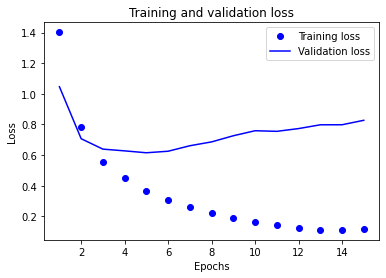

In [73]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

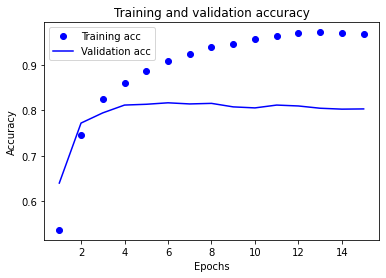

In [74]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_14 (Conv1D)          (None, None, 32)          12320     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, None, 32)          3104      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 32)              

In [ ]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 20s 110ms/step - loss: 1.3692 - accuracy: 0.5471 - val_loss: 1.0522 - val_accuracy: 0.6077
Epoch 2/15
126/126 [==============================] - 12s 95ms/step - loss: 0.7776 - accuracy: 0.7387 - val_loss: 0.6666 - val_accuracy: 0.7871
Epoch 3/15
126/126 [==============================] - 12s 95ms/step - loss: 0.5308 - accuracy: 0.8315 - val_loss: 0.6041 - val_accuracy: 0.8109
Epoch 4/15
126/126 [==============================] - 12s 95ms/step - loss: 0.4220 - accuracy: 0.8693 - val_loss: 0.6123 - val_accuracy: 0.8065
Epoch 5/15
126/126 [==============================] - 12s 95ms/step - loss: 0.3465 - accuracy: 0.8971 - val_loss: 0.6276 - val_accuracy: 0.8010
Epoch 6/15
126/126 [==============================] - 12s 96ms/step - loss: 0.2903 - accuracy: 0.9172 - val_loss: 0.6416 - val_accuracy: 0.8132
Epoch 7/15
126/126 [==============================] - 12s 97ms/step - loss: 0.2416 - accuracy: 0.9304 - val_loss: 0.6725 - val_accuracy

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_17 (Conv1D)          (None, None, 32)          12320     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, None, 32)          3104      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, None, 32)        

In [ ]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 18s 107ms/step - loss: 1.4174 - accuracy: 0.5412 - val_loss: 1.0525 - val_accuracy: 0.6221
Epoch 2/15
126/126 [==============================] - 16s 126ms/step - loss: 0.8346 - accuracy: 0.7150 - val_loss: 0.7595 - val_accuracy: 0.7463
Epoch 3/15
126/126 [==============================] - 12s 93ms/step - loss: 0.6172 - accuracy: 0.7979 - val_loss: 0.6895 - val_accuracy: 0.7801
Epoch 4/15
126/126 [==============================] - 12s 93ms/step - loss: 0.5186 - accuracy: 0.8357 - val_loss: 0.6976 - val_accuracy: 0.7821
Epoch 5/15
126/126 [==============================] - 12s 93ms/step - loss: 0.4331 - accuracy: 0.8693 - val_loss: 0.7017 - val_accuracy: 0.7923
Epoch 6/15
126/126 [==============================] - 12s 93ms/step - loss: 0.3707 - accuracy: 0.8909 - val_loss: 0.7316 - val_accuracy: 0.7861
Epoch 7/15
126/126 [==============================] - 12s 92ms/step - loss: 0.3191 - accuracy: 0.9086 - val_loss: 0.7513 - val_accurac

### **Transformer / 임베딩차원 = 32 / 배치사이즈 = 128**

In [75]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [76]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [77]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
vocab_size = 10000

## Using Sequential API
model = Sequential()
#model.add(Input(shape=(maxlen, )))
model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.1))
model.add(Dense(ff_dim, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [78]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 24s 178ms/step - loss: 1.2968 - accuracy: 0.5692 - val_loss: 0.8326 - val_accuracy: 0.7249
Epoch 2/15
126/126 [==============================] - 22s 176ms/step - loss: 0.7338 - accuracy: 0.7618 - val_loss: 0.7254 - val_accuracy: 0.7624
Epoch 3/15
126/126 [==============================] - 22s 176ms/step - loss: 0.5533 - accuracy: 0.8229 - val_loss: 0.6457 - val_accuracy: 0.7925
Epoch 4/15
126/126 [==============================] - 22s 176ms/step - loss: 0.4405 - accuracy: 0.8608 - val_loss: 0.5658 - val_accuracy: 0.8261
Epoch 5/15
126/126 [==============================] - 22s 176ms/step - loss: 0.3599 - accuracy: 0.8904 - val_loss: 0.6209 - val_accuracy: 0.8097
Epoch 6/15
126/126 [==============================] - 22s 176ms/step - loss: 0.2878 - accuracy: 0.9139 - val_loss: 0.6406 - val_accuracy: 0.8174
Epoch 7/15
126/126 [==============================] - 22s 176ms/step - loss: 0.2321 - accuracy: 0.9305 - val_loss: 0.6973 - val_ac

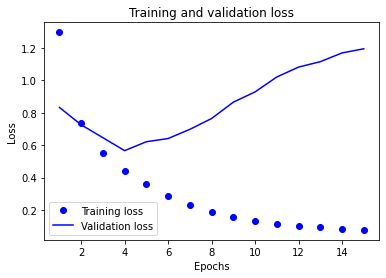

In [79]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

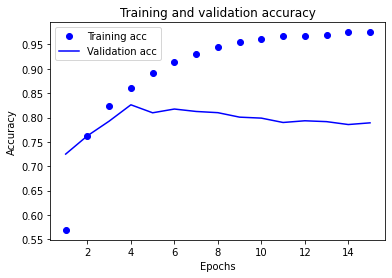

In [80]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **Transformer / 임베딩차원 = 64 / 배치사이즈 = 128**

In [81]:
embed_dim = 64  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
vocab_size = 10000

## Using Sequential API
model = Sequential()
#model.add(Input(shape=(maxlen, )))
model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.1))
model.add(Dense(ff_dim, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [82]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 41s 311ms/step - loss: 1.3492 - accuracy: 0.5704 - val_loss: 0.8400 - val_accuracy: 0.7470
Epoch 2/15
126/126 [==============================] - 39s 307ms/step - loss: 0.6298 - accuracy: 0.7973 - val_loss: 0.5657 - val_accuracy: 0.8199
Epoch 3/15
126/126 [==============================] - 39s 307ms/step - loss: 0.4452 - accuracy: 0.8629 - val_loss: 0.5740 - val_accuracy: 0.8231
Epoch 4/15
126/126 [==============================] - 39s 309ms/step - loss: 0.3367 - accuracy: 0.8981 - val_loss: 0.5858 - val_accuracy: 0.8244
Epoch 5/15
126/126 [==============================] - 39s 307ms/step - loss: 0.2586 - accuracy: 0.9200 - val_loss: 0.6640 - val_accuracy: 0.8112
Epoch 6/15
126/126 [==============================] - 39s 308ms/step - loss: 0.1985 - accuracy: 0.9409 - val_loss: 0.7623 - val_accuracy: 0.8107
Epoch 7/15
126/126 [==============================] - 39s 307ms/step - loss: 0.1475 - accuracy: 0.9560 - val_loss: 0.8951 - val_ac

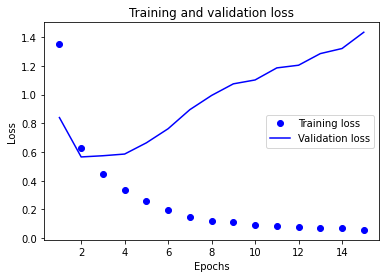

In [83]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

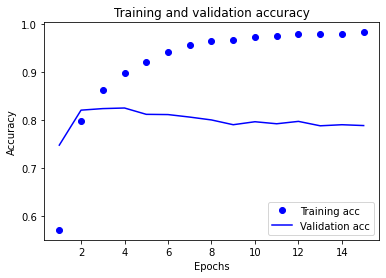

In [84]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **Transformer / 임베딩차원 = 128 / 배치사이즈 = 128**

In [85]:
embed_dim = 128  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
vocab_size = 10000

## Using Sequential API
model = Sequential()
#model.add(Input(shape=(maxlen, )))
model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.1))
model.add(Dense(ff_dim, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [86]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 93s 710ms/step - loss: 1.0948 - accuracy: 0.6410 - val_loss: 0.6491 - val_accuracy: 0.7900
Epoch 2/15
126/126 [==============================] - 84s 667ms/step - loss: 0.5566 - accuracy: 0.8216 - val_loss: 0.5546 - val_accuracy: 0.8276
Epoch 3/15
126/126 [==============================] - 83s 663ms/step - loss: 0.4006 - accuracy: 0.8760 - val_loss: 0.6044 - val_accuracy: 0.8139
Epoch 4/15
126/126 [==============================] - 83s 660ms/step - loss: 0.2988 - accuracy: 0.9087 - val_loss: 0.6137 - val_accuracy: 0.8192
Epoch 5/15
126/126 [==============================] - 87s 688ms/step - loss: 0.2228 - accuracy: 0.9310 - val_loss: 0.7310 - val_accuracy: 0.8085
Epoch 6/15
126/126 [==============================] - 83s 662ms/step - loss: 0.1718 - accuracy: 0.9475 - val_loss: 0.8162 - val_accuracy: 0.8000
Epoch 7/15
126/126 [==============================] - 82s 648ms/step - loss: 0.1426 - accuracy: 0.9573 - val_loss: 0.9290 - val_ac

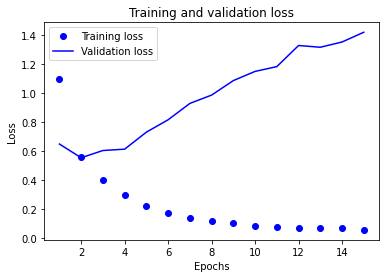

In [87]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

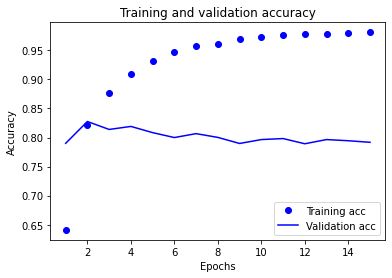

In [88]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **BERT**

In [ ]:
# install the transformers package and then import it.

%%capture 
!pip install transformers
import transformers

In [ ]:
# Loading Model and Tokenizer from the transformers package.

from transformers import AutoTokenizer,TFBertModel

In [ ]:
tokenizer_bert = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

In [ ]:
# Tokenize input data

X_train_bert = tokenizer_bert(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=120,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
X_test_bert = tokenizer_bert(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=120,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
X_train_bert

{'input_ids': <tf.Tensor: shape=(20100, 120), dtype=int32, numpy=
array([[  101,  2853,  5782, ...,     0,     0,     0],
       [  101,  2222,  2567, ...,     0,     0,     0],
       [  101, 22973,  1128, ...,     0,     0,     0],
       ...,
       [  101,  3300, 13275, ...,     0,     0,     0],
       [  101,  6268,  4891, ..., 12295,  1869,   102],
       [  101,  4586,  8362, ...,  8964,  2858,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(20100, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

## **3) 모델 학습 - 하이퍼파라미터 튜닝 & 규제(드롭아웃, 조기종료)**

In [ ]:
# batch_size
# 너무 크면 한번에 처리해야할 양이 그만큼 많기 때문에 학습 속도가 느려지거나, 메모리부족 문제 발생.
# 너무 작으면 가중치가 자주 업데이트되기 때문에 비교적 불안정하게 훈련.
# => 따라서 배치 사이즈를 바꿔가면서 언제 모델이 가장 효율적으로 훈련되는지를 살펴볼 필요가 있음.

### **CNN / single 필터수 = 32 & 커널사이즈 = 3 / 임베딩차원 = 128 / 배치사이즈 = 128**


In [97]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_9 (Conv1D)           (None, None, 32)          12320     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_30 (Dense)            (None, 9)                 297       
                                                                 
Total params: 1,292,617
Trainable params: 1,292,617
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn1.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 9s 71ms/step - loss: 1.3349 - accuracy: 0.5705 - val_loss: 0.9248 - val_accuracy: 0.7077
Epoch 2/15
126/126 [==============================] - 9s 74ms/step - loss: 0.7462 - accuracy: 0.7647 - val_loss: 0.6773 - val_accuracy: 0.7811
Epoch 3/15
126/126 [==============================] - 12s 97ms/step - loss: 0.5529 - accuracy: 0.8211 - val_loss: 0.5903 - val_accuracy: 0.8077
Epoch 4/15
126/126 [==============================] - 11s 88ms/step - loss: 0.4357 - accuracy: 0.8637 - val_loss: 0.5546 - val_accuracy: 0.8201
Epoch 5/15
126/126 [==============================] - 15s 121ms/step - loss: 0.3473 - accuracy: 0.8948 - val_loss: 0.5340 - val_accuracy: 0.8266
Epoch 6/15
126/126 [==============================] - 9s 73ms/step - loss: 0.2738 - accuracy: 0.9202 - val_loss: 0.5218 - val_accuracy: 0.8333
Epoch 7/15
126/126 [==============================] - 13s 99ms/step - loss: 0.2131 - accuracy: 0.9429 - val_loss: 0.5215 - val_accuracy: 0

### **CNN / single 필터수 = 32 & 커널사이즈 = 3 + 분류기 추가 / 임베딩차원 = 128 / 배치사이즈 = 128**


In [114]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_17 (Conv1D)          (None, None, 32)          12320     
                                                                 
 global_max_pooling1d_14 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 9)                 297       
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [115]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn9.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 10s 67ms/step - loss: 1.4807 - accuracy: 0.5317 - val_loss: 0.9539 - val_accuracy: 0.7114
Epoch 2/15
126/126 [==============================] - 8s 64ms/step - loss: 0.8455 - accuracy: 0.7257 - val_loss: 0.7092 - val_accuracy: 0.7736
Epoch 3/15
126/126 [==============================] - 8s 64ms/step - loss: 0.6584 - accuracy: 0.7836 - val_loss: 0.6311 - val_accuracy: 0.7958
Epoch 4/15
126/126 [==============================] - 8s 64ms/step - loss: 0.5455 - accuracy: 0.8213 - val_loss: 0.6010 - val_accuracy: 0.8047
Epoch 5/15
126/126 [==============================] - 8s 64ms/step - loss: 0.4565 - accuracy: 0.8548 - val_loss: 0.5912 - val_accuracy: 0.8142
Epoch 6/15
126/126 [==============================] - 8s 64ms/step - loss: 0.3742 - accuracy: 0.8827 - val_loss: 0.5814 - val_accuracy: 0.8184
Epoch 7/15
126/126 [==============================] - 8s 64ms/step - loss: 0.3089 - accuracy: 0.9074 - val_loss: 0.5801 - val_accuracy: 0.820

### **CNN / single 필터수 = 32 & 커널사이즈 = 5 / 임베딩차원 = 128 / 배치사이즈 = 128**


In [106]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          20512     
                                                                 
 global_max_pooling1d_10 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_34 (Dense)            (None, 9)                 297       
                                                                 
Total params: 1,300,809
Trainable params: 1,300,809
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [107]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn5.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 12s 91ms/step - loss: 1.3153 - accuracy: 0.5881 - val_loss: 0.8635 - val_accuracy: 0.7219
Epoch 2/15
126/126 [==============================] - 11s 89ms/step - loss: 0.6955 - accuracy: 0.7726 - val_loss: 0.6442 - val_accuracy: 0.7886
Epoch 3/15
126/126 [==============================] - 11s 90ms/step - loss: 0.5106 - accuracy: 0.8337 - val_loss: 0.5676 - val_accuracy: 0.8162
Epoch 4/15
126/126 [==============================] - 11s 89ms/step - loss: 0.3968 - accuracy: 0.8746 - val_loss: 0.5397 - val_accuracy: 0.8303
Epoch 5/15
126/126 [==============================] - 11s 89ms/step - loss: 0.3085 - accuracy: 0.9090 - val_loss: 0.5247 - val_accuracy: 0.8321
Epoch 6/15
126/126 [==============================] - 11s 88ms/step - loss: 0.2358 - accuracy: 0.9361 - val_loss: 0.5212 - val_accuracy: 0.8316
Epoch 7/15
126/126 [==============================] - 11s 88ms/step - loss: 0.1795 - accuracy: 0.9559 - val_loss: 0.5248 - val_accuracy:

### **CNN / single 필터수 = 64 & 커널사이즈 = 3 / 임베딩차원 = 128 / 배치사이즈 = 128**


In [99]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_10 (Conv1D)          (None, None, 64)          24640     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_31 (Dense)            (None, 9)                 585       
                                                                 
Total params: 1,305,225
Trainable params: 1,305,225
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [101]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn2.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 14s 110ms/step - loss: 1.0451 - accuracy: 0.6563 - val_loss: 0.7491 - val_accuracy: 0.7622
Epoch 2/15
126/126 [==============================] - 11s 87ms/step - loss: 0.6145 - accuracy: 0.7973 - val_loss: 0.5911 - val_accuracy: 0.8050
Epoch 3/15
126/126 [==============================] - 11s 87ms/step - loss: 0.4700 - accuracy: 0.8472 - val_loss: 0.5326 - val_accuracy: 0.8256
Epoch 4/15
126/126 [==============================] - 11s 86ms/step - loss: 0.3699 - accuracy: 0.8846 - val_loss: 0.5118 - val_accuracy: 0.8378
Epoch 5/15
126/126 [==============================] - 11s 86ms/step - loss: 0.2888 - accuracy: 0.9144 - val_loss: 0.5020 - val_accuracy: 0.8391
Epoch 6/15
126/126 [==============================] - 11s 85ms/step - loss: 0.2208 - accuracy: 0.9388 - val_loss: 0.4964 - val_accuracy: 0.8465
Epoch 7/15
126/126 [==============================] - 11s 85ms/step - loss: 0.1652 - accuracy: 0.9586 - val_loss: 0.5016 - val_accuracy

### **CNN / single 필터수 = 64 & 커널사이즈 = 3 + 분류기 추가 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [116]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_18 (Conv1D)          (None, None, 64)          24640     
                                                                 
 global_max_pooling1d_15 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 9)                 297       
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [117]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn10.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 11s 82ms/step - loss: 1.3678 - accuracy: 0.5791 - val_loss: 0.8511 - val_accuracy: 0.7391
Epoch 2/15
126/126 [==============================] - 10s 81ms/step - loss: 0.7188 - accuracy: 0.7672 - val_loss: 0.6240 - val_accuracy: 0.7945
Epoch 3/15
126/126 [==============================] - 10s 82ms/step - loss: 0.5350 - accuracy: 0.8284 - val_loss: 0.5478 - val_accuracy: 0.8246
Epoch 4/15
126/126 [==============================] - 10s 82ms/step - loss: 0.4147 - accuracy: 0.8701 - val_loss: 0.5308 - val_accuracy: 0.8264
Epoch 5/15
126/126 [==============================] - 10s 82ms/step - loss: 0.3260 - accuracy: 0.8986 - val_loss: 0.5232 - val_accuracy: 0.8388
Epoch 6/15
126/126 [==============================] - 10s 81ms/step - loss: 0.2481 - accuracy: 0.9277 - val_loss: 0.5308 - val_accuracy: 0.8405
Epoch 7/15
126/126 [==============================] - 10s 81ms/step - loss: 0.1892 - accuracy: 0.9466 - val_loss: 0.5422 - val_accuracy:

### **CNN / single 필터수 = 64 & 커널사이즈 = 5 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [108]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_14 (Conv1D)          (None, None, 64)          41024     
                                                                 
 global_max_pooling1d_11 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_35 (Dense)            (None, 9)                 585       
                                                                 
Total params: 1,321,609
Trainable params: 1,321,609
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn6.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 21s 161ms/step - loss: 1.2639 - accuracy: 0.6007 - val_loss: 0.7838 - val_accuracy: 0.7493
Epoch 2/15
126/126 [==============================] - 28s 220ms/step - loss: 0.6321 - accuracy: 0.7925 - val_loss: 0.5874 - val_accuracy: 0.8097
Epoch 3/15
126/126 [==============================] - 19s 147ms/step - loss: 0.4620 - accuracy: 0.8521 - val_loss: 0.5227 - val_accuracy: 0.8299
Epoch 4/15
126/126 [==============================] - 16s 123ms/step - loss: 0.3533 - accuracy: 0.8927 - val_loss: 0.5011 - val_accuracy: 0.8425
Epoch 5/15
126/126 [==============================] - 15s 120ms/step - loss: 0.2712 - accuracy: 0.9220 - val_loss: 0.4952 - val_accuracy: 0.8475
Epoch 6/15
126/126 [==============================] - 15s 118ms/step - loss: 0.2026 - accuracy: 0.9466 - val_loss: 0.4985 - val_accuracy: 0.8490
Epoch 7/15
126/126 [==============================] - 15s 118ms/step - loss: 0.1490 - accuracy: 0.9651 - val_loss: 0.5084 - val_ac

### **CNN / single 필터수 = 128 & 커널사이즈 = 3 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [102]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_11 (Conv1D)          (None, None, 128)         49280     
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_32 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 1,330,441
Trainable params: 1,330,441
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [103]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn3.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 16s 124ms/step - loss: 1.2056 - accuracy: 0.6237 - val_loss: 0.7467 - val_accuracy: 0.7560
Epoch 2/15
126/126 [==============================] - 16s 130ms/step - loss: 0.6138 - accuracy: 0.7908 - val_loss: 0.5846 - val_accuracy: 0.7988
Epoch 3/15
126/126 [==============================] - 16s 123ms/step - loss: 0.4683 - accuracy: 0.8464 - val_loss: 0.5209 - val_accuracy: 0.8306
Epoch 4/15
126/126 [==============================] - 15s 122ms/step - loss: 0.3630 - accuracy: 0.8852 - val_loss: 0.4941 - val_accuracy: 0.8425
Epoch 5/15
126/126 [==============================] - 16s 123ms/step - loss: 0.2807 - accuracy: 0.9155 - val_loss: 0.4855 - val_accuracy: 0.8453
Epoch 6/15
126/126 [==============================] - 16s 123ms/step - loss: 0.2114 - accuracy: 0.9407 - val_loss: 0.4825 - val_accuracy: 0.8505
Epoch 7/15
126/126 [==============================] - 16s 124ms/step - loss: 0.1556 - accuracy: 0.9616 - val_loss: 0.4923 - val_ac

### **CNN / single 필터수 = 128 & 커널사이즈 = 3 + 분류기 추가 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [118]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_19 (Conv1D)          (None, None, 128)         49280     
                                                                 
 global_max_pooling1d_16 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_42 (Dense)            (None, 32)                4128      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 9)                 297       
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [119]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn11.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 18s 135ms/step - loss: 1.2533 - accuracy: 0.6060 - val_loss: 0.7551 - val_accuracy: 0.7510
Epoch 2/15
126/126 [==============================] - 23s 184ms/step - loss: 0.6762 - accuracy: 0.7735 - val_loss: 0.5947 - val_accuracy: 0.8060
Epoch 3/15
126/126 [==============================] - 23s 183ms/step - loss: 0.5283 - accuracy: 0.8282 - val_loss: 0.5237 - val_accuracy: 0.8321
Epoch 4/15
126/126 [==============================] - 17s 131ms/step - loss: 0.4139 - accuracy: 0.8682 - val_loss: 0.4987 - val_accuracy: 0.8438
Epoch 5/15
126/126 [==============================] - 15s 119ms/step - loss: 0.3265 - accuracy: 0.8990 - val_loss: 0.5089 - val_accuracy: 0.8448
Epoch 6/15
126/126 [==============================] - 15s 118ms/step - loss: 0.2461 - accuracy: 0.9256 - val_loss: 0.4997 - val_accuracy: 0.8527
Epoch 7/15
126/126 [==============================] - 15s 119ms/step - loss: 0.1838 - accuracy: 0.9485 - val_loss: 0.5292 - val_ac

### **CNN / single 필터수 = 128 & 커널사이즈 = 5 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [110]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_15 (Conv1D)          (None, None, 128)         82048     
                                                                 
 global_max_pooling1d_12 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_36 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 1,363,209
Trainable params: 1,363,209
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [111]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn7.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 28s 215ms/step - loss: 1.1721 - accuracy: 0.6285 - val_loss: 0.7191 - val_accuracy: 0.7607
Epoch 2/15
126/126 [==============================] - 26s 207ms/step - loss: 0.5851 - accuracy: 0.8037 - val_loss: 0.5647 - val_accuracy: 0.8154
Epoch 3/15
126/126 [==============================] - 26s 210ms/step - loss: 0.4330 - accuracy: 0.8599 - val_loss: 0.5062 - val_accuracy: 0.8398
Epoch 4/15
126/126 [==============================] - 26s 208ms/step - loss: 0.3245 - accuracy: 0.8988 - val_loss: 0.4895 - val_accuracy: 0.8448
Epoch 5/15
126/126 [==============================] - 26s 207ms/step - loss: 0.2413 - accuracy: 0.9301 - val_loss: 0.4901 - val_accuracy: 0.8502
Epoch 6/15
126/126 [==============================] - 26s 207ms/step - loss: 0.1732 - accuracy: 0.9545 - val_loss: 0.4950 - val_accuracy: 0.8542
Epoch 7/15
126/126 [==============================] - 26s 207ms/step - loss: 0.1218 - accuracy: 0.9714 - val_loss: 0.5134 - val_ac

### **CNN / single 필터수 = 256 & 커널사이즈 = 3 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [104]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_12 (Conv1D)          (None, None, 256)         98560     
                                                                 
 global_max_pooling1d_9 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_33 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 1,380,873
Trainable params: 1,380,873
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [105]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn4.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 30s 237ms/step - loss: 1.1175 - accuracy: 0.6419 - val_loss: 0.6857 - val_accuracy: 0.7724
Epoch 2/15
126/126 [==============================] - 29s 234ms/step - loss: 0.5680 - accuracy: 0.8044 - val_loss: 0.5532 - val_accuracy: 0.8177
Epoch 3/15
126/126 [==============================] - 29s 234ms/step - loss: 0.4303 - accuracy: 0.8585 - val_loss: 0.5010 - val_accuracy: 0.8418
Epoch 4/15
126/126 [==============================] - 30s 237ms/step - loss: 0.3286 - accuracy: 0.8958 - val_loss: 0.4839 - val_accuracy: 0.8507
Epoch 5/15
126/126 [==============================] - 29s 233ms/step - loss: 0.2471 - accuracy: 0.9251 - val_loss: 0.4895 - val_accuracy: 0.8530
Epoch 6/15
126/126 [==============================] - 29s 233ms/step - loss: 0.1790 - accuracy: 0.9507 - val_loss: 0.4949 - val_accuracy: 0.8547
Epoch 7/15
126/126 [==============================] - 29s 233ms/step - loss: 0.1263 - accuracy: 0.9695 - val_loss: 0.5194 - val_ac

### **CNN / single 필터수 = 256 & 커널사이즈 = 3 + 분류기 추가 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [120]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_20 (Conv1D)          (None, None, 256)         98560     
                                                                 
 global_max_pooling1d_17 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_44 (Dense)            (None, 32)                8224      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 9)                 297       
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [121]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn12.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 30s 234ms/step - loss: 1.2288 - accuracy: 0.6204 - val_loss: 0.7615 - val_accuracy: 0.7520
Epoch 2/15
126/126 [==============================] - 30s 241ms/step - loss: 0.6595 - accuracy: 0.7841 - val_loss: 0.5819 - val_accuracy: 0.8117
Epoch 3/15
126/126 [==============================] - 29s 232ms/step - loss: 0.4937 - accuracy: 0.8418 - val_loss: 0.5229 - val_accuracy: 0.8343
Epoch 4/15
126/126 [==============================] - 29s 231ms/step - loss: 0.3851 - accuracy: 0.8782 - val_loss: 0.5132 - val_accuracy: 0.8448
Epoch 5/15
126/126 [==============================] - 29s 231ms/step - loss: 0.2970 - accuracy: 0.9110 - val_loss: 0.5130 - val_accuracy: 0.8502
Epoch 6/15
126/126 [==============================] - 29s 230ms/step - loss: 0.2220 - accuracy: 0.9348 - val_loss: 0.5353 - val_accuracy: 0.8408
Epoch 7/15
126/126 [==============================] - 29s 231ms/step - loss: 0.1626 - accuracy: 0.9534 - val_loss: 0.5625 - val_ac

### **CNN / single 필터수 = 256 & 커널사이즈 = 5 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [112]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_16 (Conv1D)          (None, None, 256)         164096    
                                                                 
 global_max_pooling1d_13 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_37 (Dense)            (None, 9)                 2313      
                                                                 
Total params: 1,446,409
Trainable params: 1,446,409
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [113]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn8.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 43s 337ms/step - loss: 1.0790 - accuracy: 0.6591 - val_loss: 0.6594 - val_accuracy: 0.7833
Epoch 2/15
126/126 [==============================] - 42s 335ms/step - loss: 0.5401 - accuracy: 0.8182 - val_loss: 0.5370 - val_accuracy: 0.8254
Epoch 3/15
126/126 [==============================] - 42s 336ms/step - loss: 0.3933 - accuracy: 0.8731 - val_loss: 0.4930 - val_accuracy: 0.8465
Epoch 4/15
126/126 [==============================] - 42s 333ms/step - loss: 0.2877 - accuracy: 0.9126 - val_loss: 0.4935 - val_accuracy: 0.8433
Epoch 5/15
126/126 [==============================] - 42s 333ms/step - loss: 0.2073 - accuracy: 0.9419 - val_loss: 0.5111 - val_accuracy: 0.8443
Epoch 6/15
126/126 [==============================] - 42s 333ms/step - loss: 0.1434 - accuracy: 0.9640 - val_loss: 0.5273 - val_accuracy: 0.8458
Epoch 7/15
126/126 [==============================] - 42s 334ms/step - loss: 0.0970 - accuracy: 0.9792 - val_loss: 0.5571 - val_ac

### **CNN / single 필터수 = 256 & 커널사이즈 = 3 + 분류기 추가 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [124]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(MaxPooling1D())
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))  # input_shape=[None, 1]
model.add(GlobalMaxPooling1D())
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_23 (Conv1D)          (None, None, 64)          24640     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 conv1d_24 (Conv1D)          (None, None, 128)         24704     
                                                                 
 global_max_pooling1d_19 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_47 (Dense)            (None, 9)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [125]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-cnn13.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
126/126 [==============================] - 16s 122ms/step - loss: 1.2948 - accuracy: 0.5687 - val_loss: 0.8257 - val_accuracy: 0.7147
Epoch 2/15
126/126 [==============================] - 17s 132ms/step - loss: 0.6578 - accuracy: 0.7802 - val_loss: 0.6199 - val_accuracy: 0.7973
Epoch 3/15
126/126 [==============================] - 17s 133ms/step - loss: 0.4731 - accuracy: 0.8428 - val_loss: 0.5593 - val_accuracy: 0.8224
Epoch 4/15
126/126 [==============================] - 17s 132ms/step - loss: 0.3542 - accuracy: 0.8877 - val_loss: 0.5481 - val_accuracy: 0.8296
Epoch 5/15
126/126 [==============================] - 16s 131ms/step - loss: 0.2642 - accuracy: 0.9203 - val_loss: 0.5709 - val_accuracy: 0.8351
Epoch 6/15
126/126 [==============================] - 16s 127ms/step - loss: 0.1952 - accuracy: 0.9447 - val_loss: 0.6092 - val_accuracy: 0.8284
Epoch 7/15
126/126 [==============================] - 16s 131ms/step - loss: 0.1387 - accuracy: 0.9649 - val_loss: 0.6520 - val_ac

## **4) 테스트 데이터 평가**

In [126]:
best_model = tf.keras.models.load_model('best-cnn4.h5')
best_model.evaluate(test_seq_matrix, y_test)

158/158 [==============================] - 3s 17ms/step - loss: 0.4882 - accuracy: 0.8400


[0.48818036913871765, 0.8400318622589111]